# GDP Prediction Project

The used features is

- Gross Domestic Product (Quarterly GDP) 1947 - 2024
- Import Goods and Services (Quarterly Import) 1947 - 2024
- Gross Private Domestic Investment (Quarterly Investment) 1947 - 2024
- Personal Consumption Expenditure (Monthly Consumption) 1947 to 2024
- Personal Consumption Expenditures: energy goods and services (monthly) 1959-01-01 to 2024-10-01
- Export Goods and Services (Quarterly Export) 1947 to 2024
---
- Industrial Production: Manufacturing (Quarterly Index) 1972 to 2024-10-01
- Industrial Production: Utilites: Electric and Gas Utilites (Quarterly Index) 1947-01-01 to 2024-10-01
- Producer Price Index by Industry: Industrial Gas Manufacturing (Quarterly index) 2004-01-01 to 2024-10-01
- Industrial Production: Manufacturing: Nondurable Goods: Chemical (Quarterly Index) 1972-01-01 to 2024-10-01
- Industrial Production: Manufacturing: Nondurable Goods: Food, Beverage, and Tobacco (Quarterly Index) 1972-01-01 to 2024-10-01

- Board of Governors of the Federal Reserve System (US), Industrial Production: Consumer Goods [IPCONGD], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPCONGD, March 13, 2025.

- U.S. Bureau of Economic Analysis, Gross Domestic Product [GDP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDP, March 13, 2025.

-

## Import All Packages

In [3]:
# Import Package
!pip install fredapi
import fredapi as fa
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import userdata

# Access the API key from Colab's secrets manager
key_api = userdata.get('fred_api_key')

# Initialize the fredapi client with the API key
fred = fa.Fred(api_key=key_api)

## Import Data

In [4]:
# Gross Domestic Product (quarterly) 1947-01-01 to 2024-10-01
gdp = fred.get_series("GDP", observation_start = '1947-01-01', observation_end='2024-10-01')
gdp.name = 'gdp'
df_gdp = gdp.to_frame().reset_index()
df_gdp.columns = ['date', 'gdp']
df_gdp.head()

,date,gdp
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [ ]:
# Import Goods and Services (quarterly) 1947-01-01 to 2024-10-01
imp_goods_services = fred.get_series("IMPGS", observation_start='1947-01-01', observation_end='2024-10-01')
imp_goods_services.name = 'imp_goods_services'
df_impgs = imp_goods_services.to_frame().reset_index()
df_impgs.columns = ['date', 'impgs']
df_impgs.tail()

,date,impgs
307,2023-10-01,3882.899
308,2024-01-01,3966.989
309,2024-04-01,4061.192
310,2024-07-01,4163.975
311,2024-10-01,4141.013


In [ ]:
# Gross Private Domestic Investment (quarterly) 1947-01-01 to 2024-10-01
gross_priv_dom_inv = fred.get_series("GPDIC1", observation_start='1947-01-01', observation_end='2024-10-01')
gross_priv_dom_inv.name = 'gross_priv_dom_inv'
df_gpdic = gross_priv_dom_inv.to_frame().reset_index()
df_gpdic.columns = ['date', 'gpdic']
df_gpdic.tail()

,date,gpdic
307,2023-10-01,4244.835
308,2024-01-01,4282.515
309,2024-04-01,4369.185
310,2024-07-01,4377.736
311,2024-10-01,4315.094


In [ ]:
# Personal Consumption Expenditure (quarterly) 1947-01-01 to 2024-10-01
personal_cons_exp = fred.get_series("pcec", observation_start='1947-01-01', observation_end='2024-10-01')
personal_cons_exp.name = 'pers_cons_expenditures'
df_pce = personal_cons_exp.to_frame().reset_index()
df_pce.columns = ['date', 'pce']
df_pce.tail()

,date,pce
307,2023-10-01,19170.154
308,2024-01-01,19424.775
309,2024-04-01,19682.699
310,2024-07-01,19938.425
311,2024-10-01,20255.455


In [ ]:
# Export Goods and Services (quarterly) 1947-01-01 to 2024-10-01
export_goods_services = fred.get_series("EXPGS", observation_start='1947-01-01', observation_end='2024-10-01')
export_goods_services.name = 'export_goods_services'
df_expgs = export_goods_services.to_frame().reset_index()
df_expgs.columns = ['date', 'expgs']
df_expgs.tail(7)

,date,expgs
305,2023-04-01,2995.524
306,2023-07-01,3062.041
307,2023-10-01,3091.748
308,2024-01-01,3125.421
309,2024-04-01,3154.321
310,2024-07-01,3220.292
311,2024-10-01,3220.929


In [ ]:
# Personal Consumption Expenditures: energy goods and services (monthly) 1959-01-01 to 2024-10-01
personal_cons_exp_energy_services = fred.get_series("DNRGRC1M027SBEA", observation_start='1959-01-01', observation_end='2024-10-01', frequency='q')
personal_cons_exp_energy_services.name = 'personal_cons_exp_energy'
df_cons_energy = personal_cons_exp_energy_services.to_frame().reset_index()
df_cons_energy.columns = ['date', 'pceens']
df_cons_energy.tail()

,date,pceens
259,2023-10-01,771.7
260,2024-01-01,757.2
261,2024-04-01,776.0
262,2024-07-01,749.6
263,2024-10-01,737.4


In [ ]:
# industrial Production: Manufacturing (Monthly Index) Starting Date: 1972-01-01 to 2024-10-01
industrial_production_manufacturing = fred.get_series("IPMAN", observation_start='1972-01-01', observation_end='2024-10-01', frequency='q')
industrial_production_manufacturing.name = 'industrial_production_manufacturing'
df_ipman = industrial_production_manufacturing.to_frame().reset_index()
df_ipman.columns = ['date', 'ipman']
df_ipman.tail()

,date,ipman
207,2023-10-01,99.6704
208,2024-01-01,99.4521
209,2024-04-01,99.8018
210,2024-07-01,99.6322
211,2024-10-01,99.2747


In [ ]:
# Industrial Production: Utilites: Electric and Gas Utilites (Monthly Index) Starting Date: 1947-01-01
industrial_production_utilities = fred.get_series("IPUTIL", observation_start='1947-01-01', observation_end='2024-10-01', frequency ='q')
industrial_production_utilities.name = 'industrial_production_utilities'
df_iputil = industrial_production_utilities.to_frame().reset_index()
df_iputil.columns = ['date', 'iputil']
df_iputil.tail()

,date,iputil
307,2023-10-01,104.8174
308,2024-01-01,104.0230
309,2024-04-01,106.8454
310,2024-07-01,106.4828
311,2024-10-01,106.3214


In [ ]:
# Producer Price Index by Industry: Industrial Gas Manufacturing (monthly index) 2004-01-01 to 2024-10-01
ppi_industry = fred.get_series('PCU325120325120', observation_start='2004-01-01', observation_end='2024-10-01', frequency='q')
ppi_industry.name = 'ppi_industry'
df_ppi_industry = ppi_industry.to_frame().reset_index()
df_ppi_industry.columns = ['date', 'ppi_industry']
df_ppi_industry.tail()

,date,ppi_industry
79,2023-10-01,237.802
80,2024-01-01,237.473
81,2024-04-01,242.265
82,2024-07-01,245.932
83,2024-10-01,239.218


In [ ]:
# Industrial Production: Manufacturing: Nondurable Goods: Chemical (Quarterly index) 1972-01-01 to 2024-10-01
chemical_goods = fred.get_series('IPG325S', observation_end = '2024-10-01', frequency = 'q')
chemical_goods.name = 'chemical_goods'
df_chemical_goods = chemical_goods.to_frame().reset_index()
df_chemical_goods.columns = ['date', 'chemical_goods']
df_chemical_goods.head()

,date,chemical_goods
0,1972-01-01,50.3595
1,1972-04-01,51.2168
2,1972-07-01,51.9185
3,1972-10-01,53.4671
4,1973-01-01,55.3498


In [ ]:
# Industrial Production: Manufacturing: Nondurable Goods: Food, Beverage, and Tobacco (quarterly index) 1972-01-01
food_goods = fred.get_series('IPG311A2S', observation_end = '2024-10-01', frequency = 'q')
food_goods.name = 'food_bev_tob_goods'
df_food_goods = food_goods.to_frame().reset_index()
df_food_goods.columns = ['date', 'food_bev_tob_goods']
df_food_goods.head()

,date,food_bev_tob_goods
0,1972-01-01,60.4116
1,1972-04-01,60.9995
2,1972-07-01,60.7088
3,1972-10-01,61.1231
4,1973-01-01,61.3943


## Preprocessing Steps

In [ ]:
# Turn all data into YoY Growth
def yoy_growth(df, column_name):
  df['yoy_'+column_name] = df[column_name].pct_change(periods=4)*100
  return df

df_gdp = yoy_growth(df_gdp, 'gdp') # YoY GDP
df_impgs = yoy_growth(df_impgs, 'impgs') # YoY Import
df_gpdic = yoy_growth(df_gpdic, 'gpdic') # YoY Gross Private Domestic Insvestment
df_pce = yoy_growth(df_pce, 'pce') # YoY Personal Consuption Expenditures
df_expgs = yoy_growth(df_expgs, 'expgs') # YoY Export
df_cons_energy = yoy_growth(df_cons_energy, 'pceens') # YoY Personal Consmption Expenditures: Energy and Goods
df_ipman = yoy_growth(df_ipman, 'ipman') # YoY Industrial Production: Manufacturing
df_iputil = yoy_growth(df_iputil, 'iputil') # YoY Industrial Production: Utilites
df_ppi_industry = yoy_growth(df_ppi_industry, 'ppi_industry') # YoY Producer Price Index by Industry: Industrial Gas Manufacturing
df_chemical_goods = yoy_growth(df_chemical_goods, 'chemical_goods') # YoY Industrial Production: Manufacturing: Nondurable Goods: Chemical
df_food_goods = yoy_growth(df_food_goods, 'food_bev_tob_goods') # YoY

In [ ]:
# copy all dataset
df_gdp_c = df_gdp.copy()
df_impgs_c = df_impgs.copy()
df_gpdic_c = df_gpdic.copy()
df_pce_c = df_pce.copy()
df_expgs_c = df_expgs.copy()
df_cons_energy_c = df_cons_energy.copy()
df_iputil_c = df_iputil.copy()
df_ppi_industry_c = df_ppi_industry.copy()
df_chemical_goods_c = df_chemical_goods.copy()
df_food_goods_c = df_food_goods.copy()
df_ipman_c = df_ipman.copy()

## Visualize all Feature

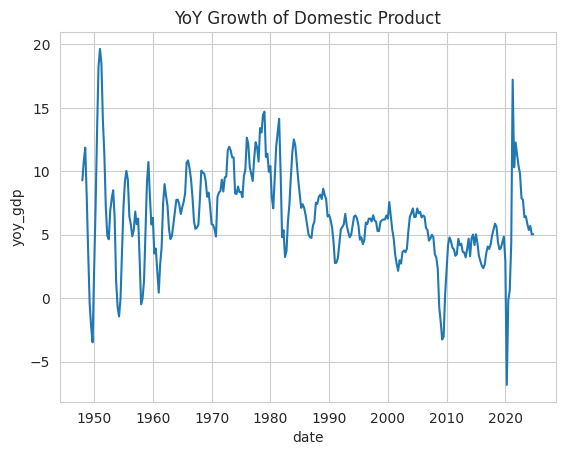

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('whitegrid')
# Gross Domestic Product (YoY)
sns.lineplot(data=df_gdp, x='date', y='yoy_gdp')
plt.title('YoY Growth of Domestic Product')
plt.show()

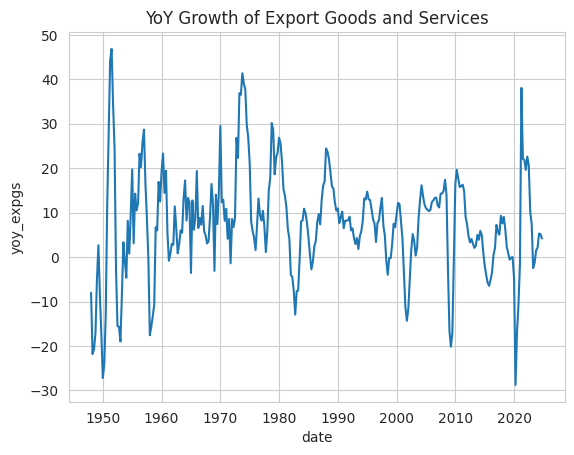

In [ ]:
# Export Goods and Services (YoY)
sns.lineplot(data = df_expgs, x='date', y='yoy_expgs')
plt.title('YoY Growth of Export Goods and Services')
plt.show()

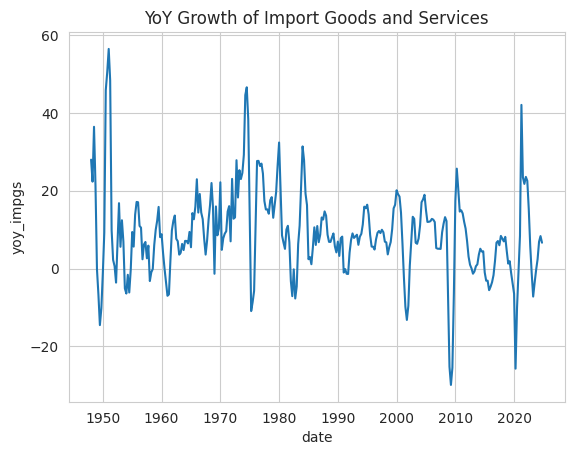

In [ ]:
# Import Goods and Services (YoY)
sns.lineplot(data = df_impgs, x='date', y='yoy_impgs')
plt.title('YoY Growth of Import Goods and Services')
plt.show()

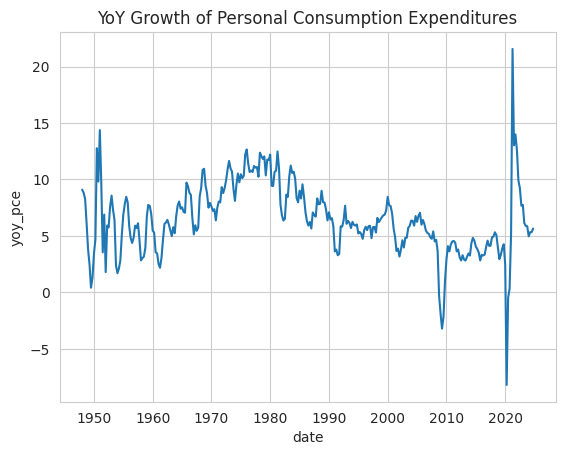

In [ ]:
# Personal Consumption and Expenditures (YoY)
sns.lineplot(data = df_pce, x='date', y='yoy_pce')
plt.title('YoY Growth of Personal Consumption Expenditures')
plt.show()

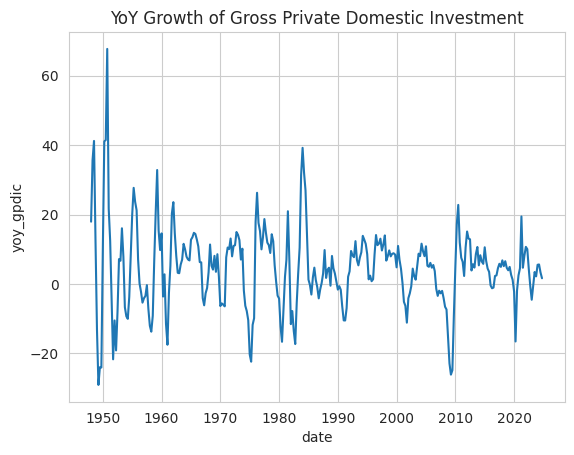

In [ ]:
# Gross Private Domestic Investment (YoY)
sns.lineplot(data = df_gpdic, x='date', y='yoy_gpdic')
plt.title('YoY Growth of Gross Private Domestic Investment')
plt.show()

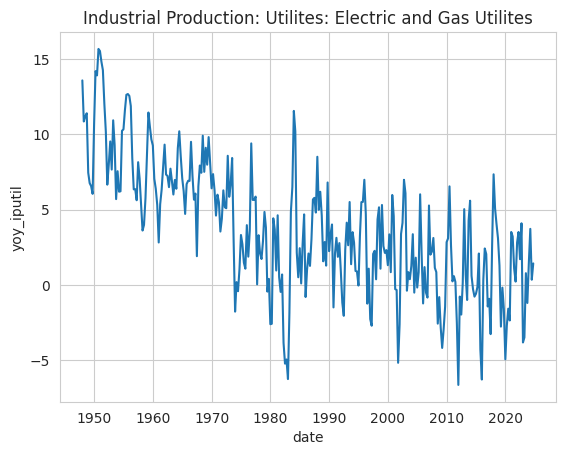

In [ ]:
# Industrial Production: Electric and Gas Utilities
sns.lineplot(data = df_iputil_c, x='date', y='yoy_iputil')
plt.title('Industrial Production: Utilites: Electric and Gas Utilites')
plt.show()

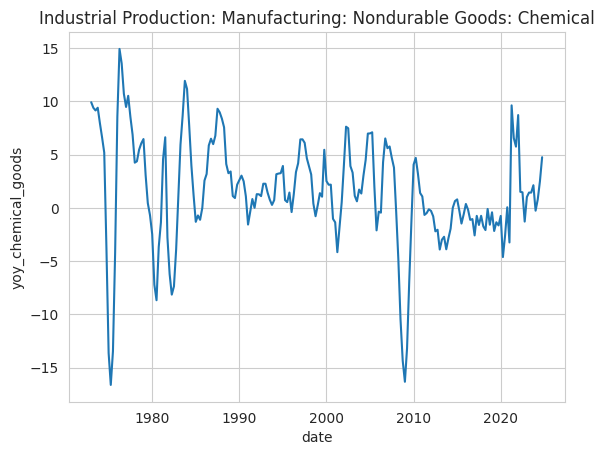

In [ ]:
# Industrial Production: Manufacturing Chemical Goods
sns.lineplot(data = df_chemical_goods_c, x='date', y='yoy_chemical_goods')
plt.title('Industrial Production: Manufacturing: Nondurable Goods: Chemical')
plt.show()

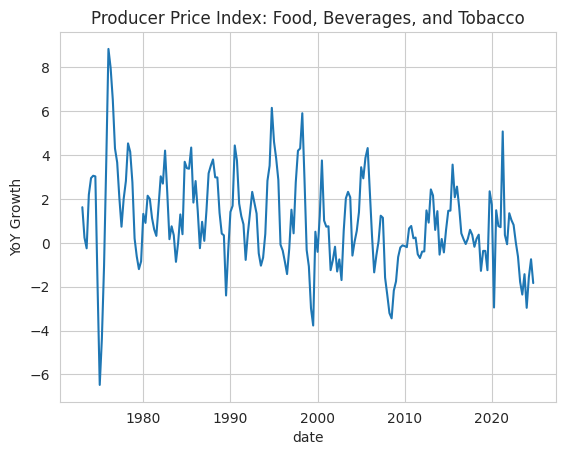

In [ ]:
# Producer Price Index: Food, Beverages, and Tobacco
sns.lineplot(data = df_food_goods_c, x='date', y='yoy_food_bev_tob_goods')
plt.title('Producer Price Index: Food, Beverages, and Tobacco')
plt.ylabel('YoY Growth')
plt.show()

## Fill Null Value with ARIMA model

In [ ]:
# Create an ARIMA function
from statsmodels.tsa.arima.model import ARIMA
def impute_with_arima(df, column_name):
  model = ARIMA(df[column_name].dropna(), order = (12, 1, 0))
  model_fit = model.fit()

  # predict missing values
  start_index = df[column_name].isnull().idxmax()
  end_index = df.index[-1]

  # Check Null value
  if pd.isnull(start_index):
    print('No Null values found for this column')
    return df

  # Fill the predicted values in-place
  df.loc[start_index:end_index,column_name] = model_fit.predict(start = start_index, end = end_index)

  return df

In [ ]:
# Create a function to visualize
def line_visualize (df1, df2, title = str, column_name = str, label_1= str, label_2 = str, started_date = '2024-10-01'):
  plt.figure(figsize = (12,4))
  sns.lineplot(data = df1, x = 'date', y = column_name, label = label_1, linewidth = 2)
  sns.lineplot(data = df2[df2['date'] <= started_date], x = 'date', y = column_name, label = label_2, linestyle = '-.', linewidth = 2)
  plt.title(f'YoY Growth of {title}')
  plt.ylabel('YoY Growth')
  return plt.show()

### 1. Import Goods and Services (ARIMA)

In [ ]:
df_impgs_arima = impute_with_arima(df_impgs_c, 'yoy_impgs')
df_impgs_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,impgs,yoy_impgs
0,1947-01-01,7.519,0.000000
1,1947-04-01,8.203,27.996016
2,1947-07-01,7.663,21.405501
3,1947-10-01,8.347,38.729828
4,1948-01-01,9.624,19.207170


### 2. Export Goods and Services (ARIMA)

In [ ]:
# ARIMA of the EXPORT GOODS AND SERVICES
df_expgs_arima = impute_with_arima(df_expgs_c, 'yoy_expgs')
df_expgs_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,expgs,yoy_expgs
0,1947-01-01,18.394,0.000000
1,1947-04-01,19.497,-8.029837
2,1947-07-01,19.433,-23.333194
3,1947-10-01,17.636,-22.178725
4,1948-01-01,16.917,-16.514271


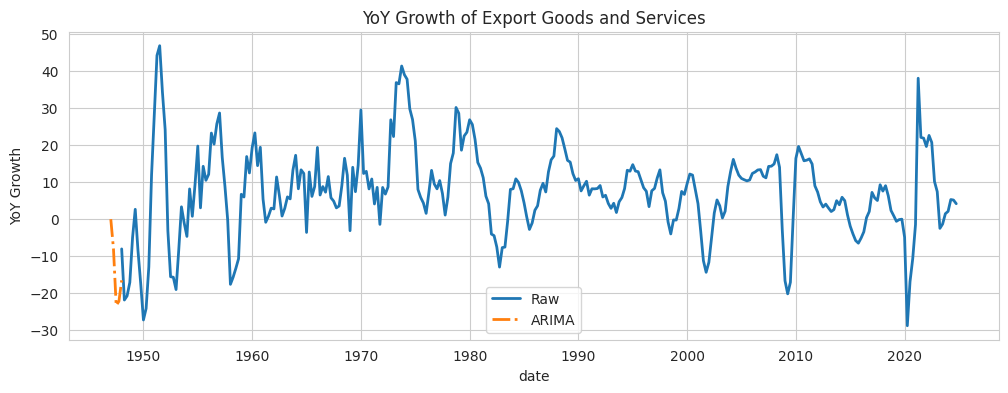

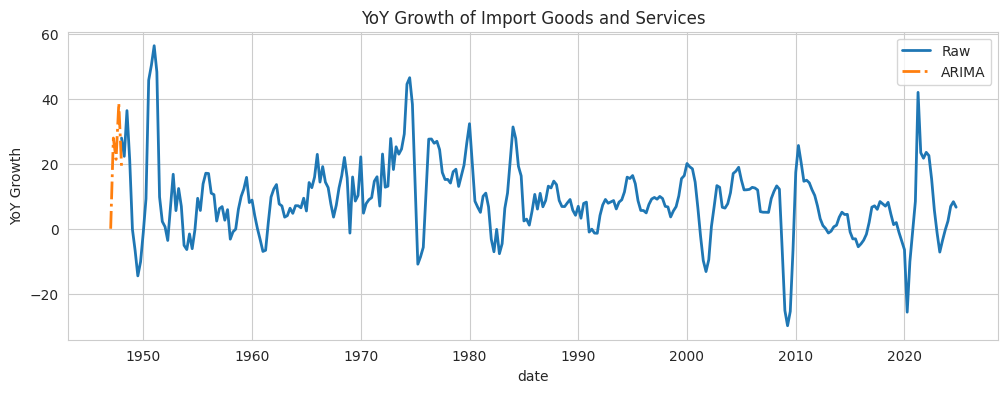

In [ ]:
# Visualize IMPORT ARIMA and EXPORT ARIMA
line_visualize(df_expgs, df_expgs_arima, 'Export Goods and Services', 'yoy_expgs','Raw', 'ARIMA', '1948-01-01')
line_visualize(df_impgs, df_impgs_arima, 'Import Goods and Services', 'yoy_impgs', 'Raw', 'ARIMA', '1948-01-01')

### 3. Personal Consumption Expenditures (ARIMA)

In [ ]:
# ARIMA of PERSONAL CONSUPTION EXPENDITURES
df_pce_arima = impute_with_arima(df_pce_c, 'yoy_pce')
df_pce_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,pce,yoy_pce
0,1947-01-01,156.161,0.000000
1,1947-04-01,160.031,9.100220
2,1947-07-01,163.543,8.850831
3,1947-10-01,167.672,8.303794
4,1948-01-01,170.372,6.284688


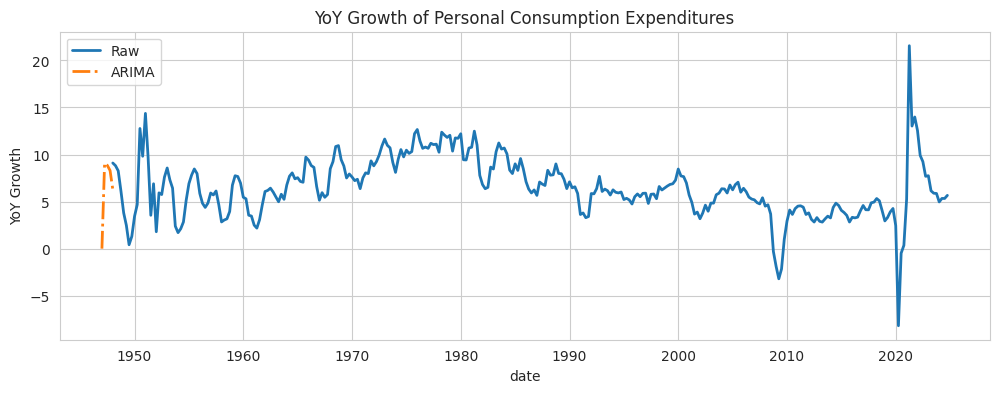

In [ ]:
# Visualize PERSONAL CONSUMPTION EXPENDITURES
line_visualize(df_pce, df_pce_arima, 'Personal Consumption Expenditures', 'yoy_pce', 'Raw', 'ARIMA', '1948-01-01')

### 4. Gross Domestic Private Investment (ARIMA)

In [ ]:
# ARIMA on GROSS PRIVATE DOMESTIC INVESTMENT
df_gpdic_arima = impute_with_arima(df_gpdic_c, 'yoy_gpdic')
df_gpdic_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,gpdic,yoy_gpdic
0,1947-01-01,227.242,0.000000
1,1947-04-01,209.836,17.941624
2,1947-07-01,203.662,40.781856
3,1947-10-01,243.072,43.225862
4,1948-01-01,268.012,0.919646


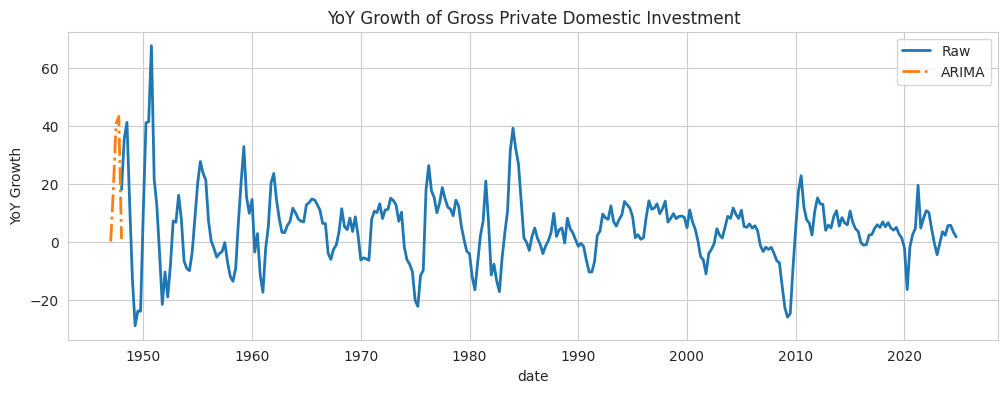

In [ ]:
# Visualize the ARIMA GROSS PRIVATE DOMESTIC INVESTMENT
line_visualize(df_gpdic, df_gpdic_arima, 'Gross Private Domestic Investment', 'yoy_gpdic', 'Raw', 'ARIMA','1948-01-01')

### 5. Gross Domestic Product (ARIMA)

In [ ]:
# ARIMA on Gross Domestic Product
df_gdp_arima = impute_with_arima(df_gdp_c, 'yoy_gdp')
df_gdp_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,gdp,yoy_gdp
0,1947-01-01,243.164,0.000000
1,1947-04-01,245.968,9.285099
2,1947-07-01,249.585,11.170242
3,1947-10-01,259.745,12.216958
4,1948-01-01,265.742,6.992506


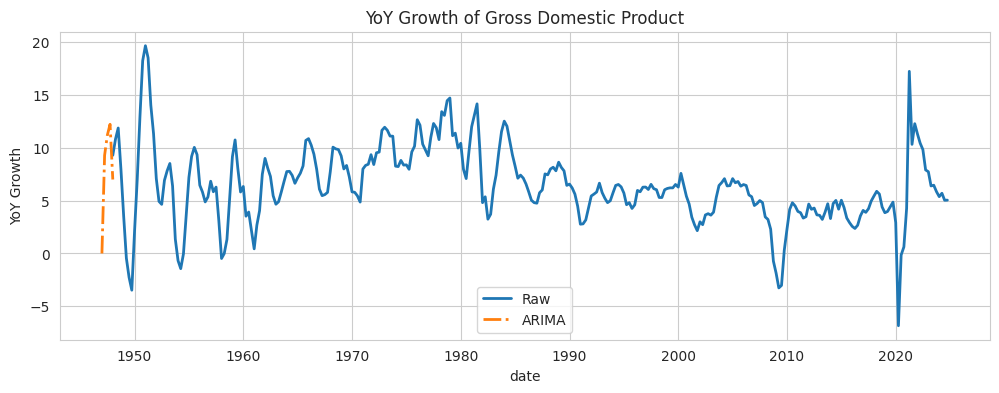

In [ ]:
# Visualize Gross Domestic Product
line_visualize(df_gdp, df_gdp_arima, 'Gross Domestic Product', 'yoy_gdp', 'Raw', 'ARIMA', '1948-01-01')

### 6. Industial Production: Utilities: Electric and Gas Utilities (ARIMA)

In [ ]:
# visualize IPUTIl
df_iputil_arima = impute_with_arima(df_iputil_c, 'yoy_iputil')
df_iputil_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,iputil,yoy_iputil
0,1947-01-01,6.3011,0.000000
1,1947-04-01,6.5552,13.575392
2,1947-07-01,6.7330,11.272033
3,1947-10-01,6.9109,11.630101
4,1948-01-01,7.1565,10.890482


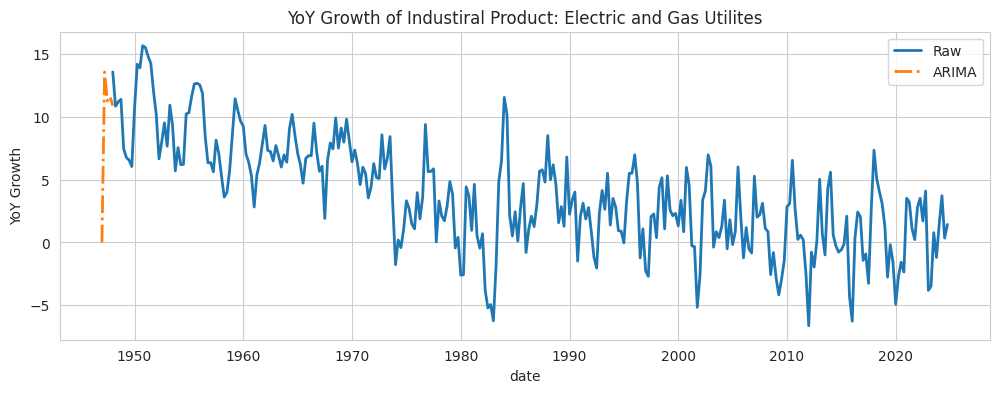

In [ ]:
line_visualize(df_iputil, df_iputil_arima, 'Industiral Product: Electric and Gas Utilites', 'yoy_iputil', 'Raw', 'ARIMA', '1948-01-01')

### 7.  Personal Consumption Expenditures: Energy and Goods (ARIMA)

In [ ]:
# ARIMA on Personal Consumption Expenditures: Energy and Goods
df_cons_energy_arima = impute_with_arima(df_cons_energy_c, 'yoy_pceens')
df_cons_energy_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,pceens,yoy_pceens
0,1959-01-01,22.7,0.000000
1,1959-04-01,22.8,4.405320
2,1959-07-01,23.0,6.452662
3,1959-10-01,23.5,5.487110
4,1960-01-01,23.7,4.032803


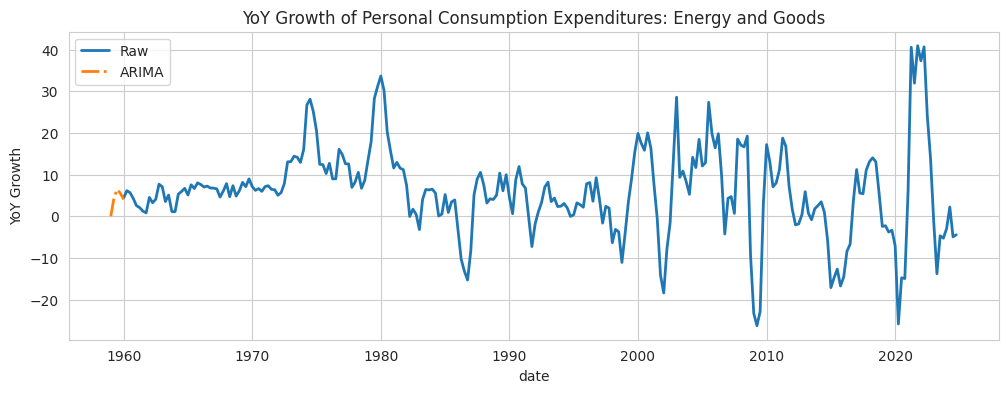

In [ ]:
# Visualize the PCE: Energy and Goods
line_visualize(df_cons_energy, df_cons_energy_arima, 'Personal Consumption Expenditures: Energy and Goods', 'yoy_pceens', 'Raw', 'ARIMA', '1960-01-01')

### 8. Industrial Production: Food, Beverages, and Tobacco (ARIMA)

In [ ]:
# ARIMA on Industrial Production: Food, Beverages, and Tobacco
df_food_goods_arima = impute_with_arima(df_food_goods_c, 'yoy_food_bev_tob_goods')
df_food_goods_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,food_bev_tob_goods,yoy_food_bev_tob_goods
0,1972-01-01,60.4116,0.000000
1,1972-04-01,60.9995,1.626675
2,1972-07-01,60.7088,0.170185
3,1972-10-01,61.1231,-0.226302
4,1973-01-01,61.3943,2.267414


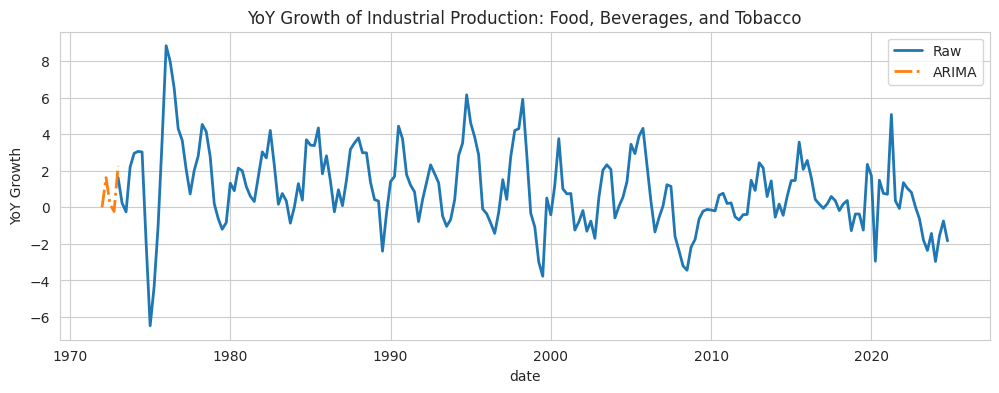

In [ ]:
# visualize the Industrial Production: Food, Beverages, and Tobacco
line_visualize(df_food_goods, df_food_goods_arima, 'Industrial Production: Food, Beverages, and Tobacco', 'yoy_food_bev_tob_goods', 'Raw', 'ARIMA', '1973-01-01')

### 9. Industrial Production: Chemical Goods

In [ ]:
# ARIMA on Industrial Production: Manufacturing Chemical Goods
df_chemical_goods_arima = impute_with_arima(df_chemical_goods_c, 'yoy_chemical_goods')
df_chemical_goods_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,chemical_goods,yoy_chemical_goods
0,1972-01-01,50.3595,0.000000
1,1972-04-01,51.2168,9.909381
2,1972-07-01,51.9185,9.202865
3,1972-10-01,53.4671,9.047806
4,1973-01-01,55.3498,9.568349


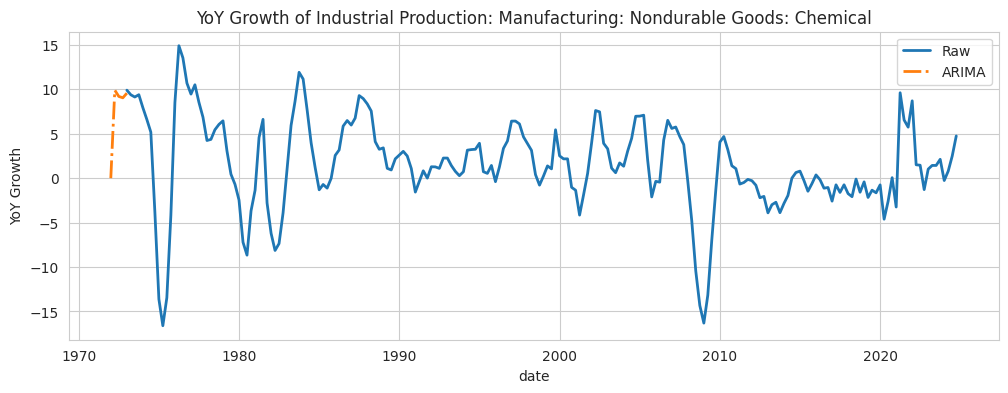

In [ ]:
# Visualize The Industrial Production: Manufacturing Chemical Goods
line_visualize(df_chemical_goods, df_chemical_goods_arima, 'Industrial Production: Manufacturing: Nondurable Goods: Chemical', 'yoy_chemical_goods', 'Raw', 'ARIMA', '1973-01-01')

### 10. Industrial Production: Manufacturing (ARIMA)

In [ ]:
# ARIMA on Industrial Production: Manufacturing
df_ipman_arima = impute_with_arima(df_ipman_c, 'yoy_ipman')
df_ipman_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,ipman,yoy_ipman
0,1972-01-01,36.2002,0.000000
1,1972-04-01,36.9480,10.956315
2,1972-07-01,37.4555,9.471815
3,1972-10-01,38.8818,8.933097
4,1973-01-01,40.1664,6.713936


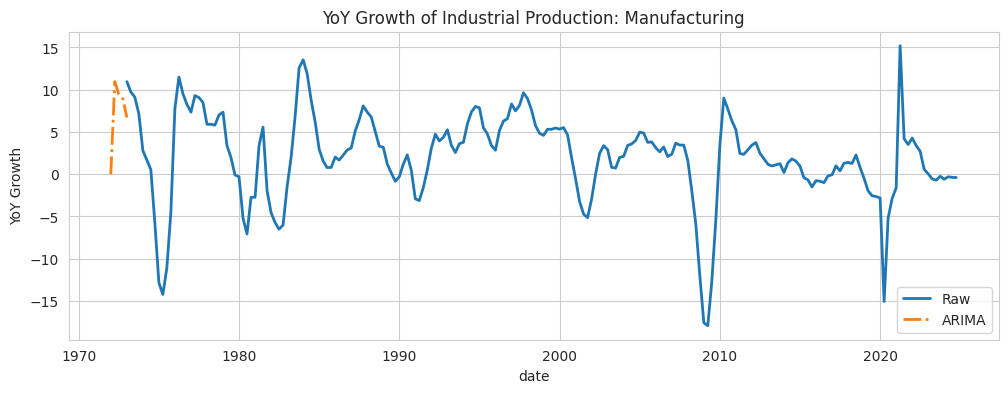

In [ ]:
# visualize Industrial Production: Manufacturing
line_visualize(df_ipman, df_ipman_arima, 'Industrial Production: Manufacturing', 'yoy_ipman', 'Raw', 'ARIMA', '1973-01-01')

### 11. Industrial Production: Industrial Gas Manufacturing (ARIMA)

In [ ]:
# ARIMA on Industrial Production: Industiral Gas Manufacturing
df_ppi_industry_arima = impute_with_arima(df_ppi_industry_c, 'yoy_ppi_industry')
df_ppi_industry_arima.head()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

,date,ppi_industry,yoy_ppi_industry
0,2004-01-01,104.433,0.000000
1,2004-04-01,105.933,8.299132
2,2004-07-01,112.333,7.880509
3,2004-10-01,110.633,1.969687
4,2005-01-01,113.100,19.492655


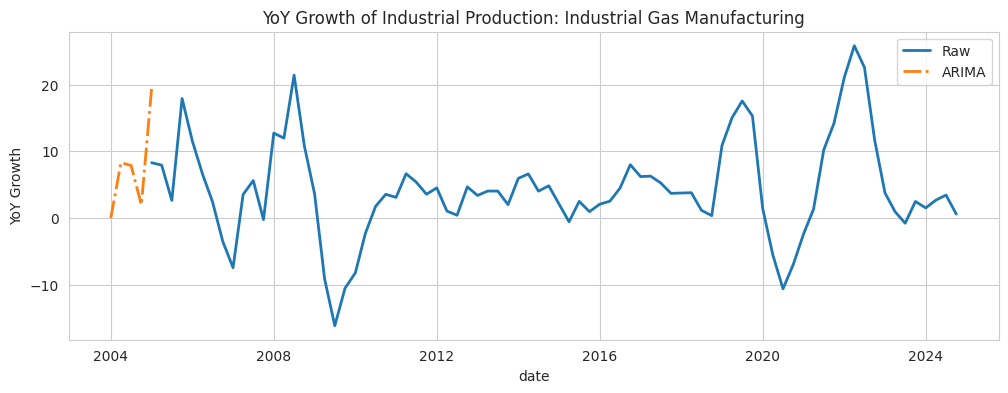

In [ ]:
# visualize the Industrial production: industrial gas manufacturing
line_visualize(df_ppi_industry, df_ppi_industry_arima, 'Industrial Production: Industrial Gas Manufacturing', 'yoy_ppi_industry', 'Raw', 'ARIMA', '2005-01-01')

## Dataset Distribution

### Create Function of Filter Date

In [ ]:
# concat the features from 1947-01-01 to 1958-10-01
from google.colab import drive
drive.mount('/content/drive')
def filter_date(dfs, start_date, end_date):
  # Create a list to store the filtered DataFrames
  df_filtered = []
  # Iterate through each DataFrame in the list
  for df in dfs:
    # Filter the DataFrame based on the date range
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    # Add the filtered DataFrame to the list
    df_filtered.append(filtered_df)

  # Merge the filtered DataFrames
  merged_df = df_filtered[0]
  for df in df_filtered[1:]:
    merged_df = pd.merge(merged_df, df, on='date', how='inner')

  return merged_df

Mounted at /content/drive


### Dataset from 1947-01-01 to 1958-10-01

In [ ]:
# from 1947 to 1958
start_date = '1947-01-01'
end_date = '1958-10-01'
dfs_to_merged = [df_gdp_arima, df_impgs_arima, df_gpdic_arima, df_pce_arima, df_expgs_arima, df_iputil_arima]
data_47_58 = filter_date(dfs_to_merged, start_date, end_date)
data_47_58.drop(['gdp','impgs','gpdic','pce','expgs', 'iputil'], axis = 1, inplace = True)
data_47_58.to_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_47_58.csv', index=False)
data_47_58.head()

,date,yoy_gdp,yoy_impgs,yoy_gpdic,yoy_pce,yoy_expgs,yoy_iputil
0,1947-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1947-04-01,9.285099,27.996016,17.941624,9.100220,-8.029837,13.575392
2,1947-07-01,11.170242,21.405501,40.781856,8.850831,-23.333194,11.272033
3,1947-10-01,12.216958,38.729828,43.225862,8.303794,-22.178725,11.630101
4,1948-01-01,6.992506,19.207170,0.919646,6.284688,-16.514271,10.890482


### Dataset from 1959-01-01 to 1971-10-01

In [ ]:
# from 1959 to 2003
start_date = '1959-01-01'
end_date = '1971-10-01'
dfs_to_merged_2 = [df_gdp_arima, df_impgs_arima, df_gpdic_arima, df_pce_arima, df_expgs_arima, df_iputil_arima, df_cons_energy_arima]
data_59_71 = filter_date(dfs_to_merged_2, start_date, end_date)
data_59_71.drop(['gdp','impgs','gpdic','pce','expgs', 'pceens', 'iputil'], axis = 1, inplace = True)
data_59_71.to_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_59_71.csv', index=False)
data_59_71.head()

,date,yoy_gdp,yoy_impgs,yoy_gpdic,yoy_pce,yoy_expgs,yoy_iputil,yoy_pceens
0,1959-01-01,3.389066,6.939004,-3.202236,5.442808,8.920565,8.606369,0.000000
1,1959-04-01,4.671393,4.935155,4.388339,4.403916,22.138117,8.018438,4.405320
2,1959-07-01,4.320277,1.957513,5.058941,4.835074,19.453789,6.385463,6.452662
3,1959-10-01,4.323786,-0.202107,-0.599315,4.332195,18.652241,6.466574,5.487110
4,1960-01-01,0.920442,-2.412482,-18.973251,3.481210,10.946509,4.631098,4.032803


### Dataset from 1972-01-01 to 2003-10-01

In [ ]:
# from 1972-01-01 to 2003-10-01
start_date = '1972-01-01'
end_date = '2003-10-01'
dfs_to_merged_3 = [df_gdp_arima, df_impgs_arima, df_gpdic_arima, df_pce_arima, df_expgs_arima, df_iputil_arima, df_cons_energy_arima, df_ipman_arima, df_chemical_goods_arima]
data_72_03 = filter_date(dfs_to_merged_3, start_date, end_date)
data_72_03.drop(['gdp','impgs','gpdic','pce','expgs', 'pceens', 'iputil', 'ipman', 'chemical_goods'], axis = 1, inplace = True)
data_72_03.to_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_72_03.csv', index = False)
data_72_03.head()

,date,yoy_gdp,yoy_impgs,yoy_gpdic,yoy_pce,yoy_expgs,yoy_iputil,yoy_pceens,yoy_ipman,yoy_chemical_goods
0,1972-01-01,11.391525,10.887492,14.816079,10.734461,14.071560,6.577054,14.467773,0.000000,0.000000
1,1972-04-01,11.454290,27.943852,12.128170,11.147667,35.060317,6.006220,12.627391,10.956315,9.909381
2,1972-07-01,11.836208,25.098468,13.838698,10.603791,34.296315,8.677898,13.662781,9.471815,9.202865
3,1972-10-01,9.138912,13.892794,2.006594,9.387069,32.458300,5.612361,10.756992,8.933097,9.047806
4,1973-01-01,10.302477,23.629960,8.476078,8.509079,38.054789,3.335770,13.394894,6.713936,9.568349


### Dataset from 2004-01-01 to 2024-10-01

In [ ]:
# from 2004 to 2024
start_date = '2004-01-01'
end_date = '2024-10-01'
dfs_to_merged_4 = [df_gdp_arima, df_impgs_arima, df_gpdic_arima, df_pce_arima, df_expgs_arima, df_iputil_arima, df_cons_energy_arima, df_ppi_industry_arima, df_chemical_goods_arima, df_food_goods_arima, df_ipman_arima]
data_04_24 = filter_date(dfs_to_merged_4, start_date, end_date)
data_04_24.drop(['gdp','impgs','gpdic','pce','expgs', 'pceens', 'iputil', 'food_bev_tob_goods', 'chemical_goods', 'ppi_industry', 'ipman'], axis = 1, inplace = True)
data_04_24.to_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_04_24.csv', index = False)
data_04_24.head()

,date,yoy_gdp,yoy_impgs,yoy_gpdic,yoy_pce,yoy_expgs,yoy_iputil,yoy_pceens,yoy_ppi_industry,yoy_chemical_goods,yoy_food_bev_tob_goods,yoy_ipman
0,2004-01-01,5.995206,15.847963,7.683527,6.038399,8.714806,0.935574,15.263316,0.000000,7.149653,2.166425,4.120666
1,2004-04-01,6.833616,9.161855,8.160143,6.162827,8.462183,0.191983,11.982693,8.299132,5.371541,2.550199,4.619584
2,2004-07-01,6.160859,8.918730,3.581329,6.311210,9.207018,3.479776,13.074350,7.880509,5.976229,2.487896,4.054827
3,2004-10-01,6.186834,7.890750,2.445733,6.530498,7.048704,2.953389,23.594385,1.969687,-1.042550,3.703569,2.239237
4,2005-01-01,5.833458,12.628265,5.636620,5.982995,9.361167,3.068325,20.869201,19.492655,-2.839120,2.934560,3.251396


### Dataset from 1947 to 2024

In [ ]:
start_date = '1947-01-01'
end_date = '2024-10-01'
dfs_to_merged = [df_gdp_arima, df_impgs_arima, df_gpdic_arima, df_pce_arima, df_expgs_arima, df_iputil_arima]
data_47_24 = filter_date(dfs_to_merged, start_date, end_date)
data_47_24.drop(['gdp','impgs','gpdic','pce','expgs', 'iputil'], axis = 1, inplace = True)
data_47_24.to_csv('/content/drive/MyDrive/Machine learning folder/Macroeconomic Prediction/data_47_24.csv', index = False)
data_47_24.tail()

,date,yoy_gdp,yoy_impgs,yoy_gpdic,yoy_pce,yoy_expgs,yoy_iputil
307,2023-10-01,5.713734,12.356925,4.858038,5.804856,8.380938,0.438260
308,2024-01-01,5.582929,8.092125,-1.727666,6.757404,5.818288,3.619744
309,2024-04-01,6.334756,7.715036,-4.902391,8.171332,8.183939,1.403142
310,2024-07-01,7.111060,6.575422,-3.473454,8.543355,7.904840,1.317290
311,2024-10-01,8.287412,8.967464,0.583993,8.885612,11.558142,1.013231


# Single Model

- Autoregressive Model
- Factor Model
- Machine Learning Model

# Machine Learning Model

- Regularized Model

- Gradient Boosting Decision Tree

## AR Model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


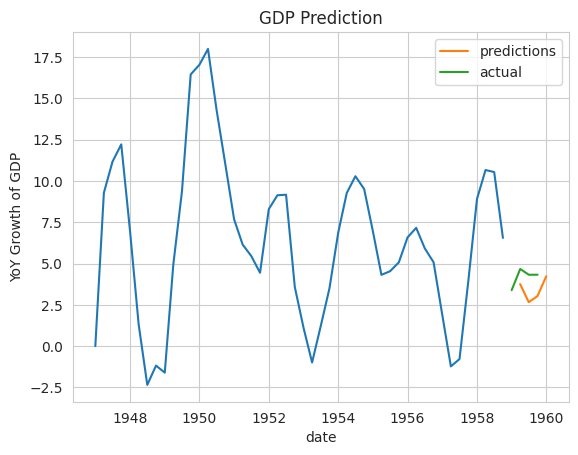

In [ ]:
# Using AR model to predict gdp
from statsmodels.tsa.ar_model import AutoReg
data = data_47_58[['date', 'yoy_gdp']]
data.set_index('date', inplace = True)

# create and fit Autoreg Model
model = AutoReg(data, lags = 2, old_names=False)
model_fit = model.fit()

# PREDICTION
predictions = model_fit.predict(start = len(data), end = len(data) + 3) # predict next 4 periods

# create a DataFrame from prediction
predictions_df = pd.DataFrame({'date':pd.date_range(start = data.index[-1], periods = 5, freq = 'Q')[1:], 'predicted_gdp':predictions})

#plot the prediction
sns.lineplot(data = data, x = 'date', y = 'yoy_gdp')
sns.lineplot(data = predictions_df, x = 'date', y = 'predicted_gdp', label = 'predictions')
sns.lineplot(data = data_59_71[:len(predictions_df)], x = 'date', y = 'yoy_gdp', label = 'actual')
plt.title('GDP Prediction')
plt.ylabel('YoY Growth of GDP')
plt.show()

In [ ]:
# create an RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(data_59_71[:len(predictions_df)]['yoy_gdp'], predictions_df['predicted_gdp']))
print(rmse)

1.2093547857771616


## Factor Model

In [ ]:
# factor model
import statsmodels.api as sm
from statsmodels.multivariate.factor import Factor

# assuming 'data' is your DataFrame with relevant variables
feat = ['yoy_gdp', 'yoy_impgs', 'yoy_gpdic', 'yoy_pce', 'yoy_expgs', 'yoy_iputil']
data_subset = data_47_58[feat]

# create and fit the factor analysis model
fac_modl = Factor(data_subset, n_factor = 2, method = 'pa')
result = fac_modl.fit()

# get factor loading
factor_loading = result.loadings
factors = result.factor_scoring(method='regression')

## Econometric Model: Autoregression + Factor Model + Squared Error

<Axes: title={'center': 'RMSE vs Lags'}, xlabel='Lag', ylabel='rmse'>

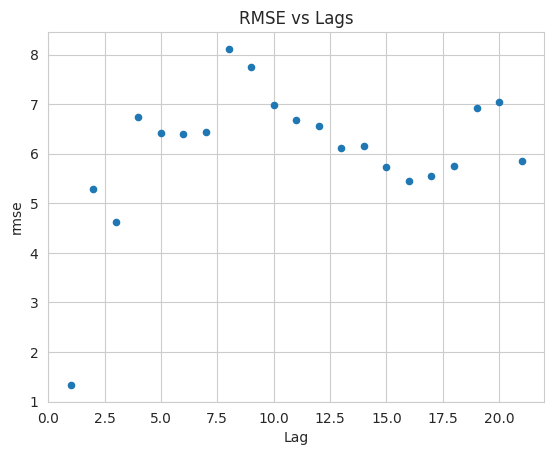

In [ ]:
# create rmse vs lag graph
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

def rmse(data, target, predict):
  return np.sqrt(mean_squared_error(data[:len(predict)][target], predict))

# Assuming you have data_47_58, data_59_71, factors, yoy_gdp defined

rmse_list = []
yoy_gdp = data_47_58['yoy_gdp']
lags = list(range(1,22))
for lag in lags:  # Test lags from 1 to 12
    # 1. Extract Factors and Target Variable
    factor1 = factors[:, 0]
    factor2 = factors[:, 1]
    fact1_ser = pd.Series(factor1)
    fact2_ser = pd.Series(factor2)
    fact1_ser.name = 'factor1'
    fact2_ser.name = 'factor2'

    # 2. Create lagged variables
    factor1_lag = fact1_ser.shift(1).dropna().values
    factor2_lag = fact2_ser.shift(1).dropna().values
    yoy_gdp_lag = yoy_gdp.shift(1).dropna().values

    # 3. Combine lagged-feature variables and lagged-target variables
    X = np.column_stack((factor1_lag, factor2_lag, yoy_gdp_lag))
    y = yoy_gdp[1:]

    # 4. Fit the AR model
    model = AutoReg(y, lags=lag, old_names=False, exog=X)
    model_fit = model.fit()

    # 5. Prediction
    exog_oos = np.tile(X[-1], (5, 1))
    # Fill potential NaNs in exog_oos with the mean of the respective column
    for i in range(exog_oos.shape[1]):
        exog_oos[:, i] = np.nan_to_num(exog_oos[:, i], np.nanmean(exog_oos[:, i]))

    pred = model_fit.predict(start=len(y), end=len(y) + 4, exog_oos=exog_oos)
    pred.drop(pred.index[-1], inplace=True)

    # 6. Calculate RMSE and append to the list
    rmse_val = rmse(data_59_71, 'yoy_gdp', pred)
    rmse_list.append(rmse_val)

# Print the RMSE list
rmse_df = pd.DataFrame({'Lag':lags, 'rmse':rmse_list})
rmse_df.plot(kind = 'scatter', x = 'Lag', y = 'rmse', title = 'RMSE vs Lags')

# You can further process the rmse_list to find the optimal lag

<Axes: title={'center': 'RMSE vs Exog Variables'}, xlabel='variables', ylabel='rmse'>

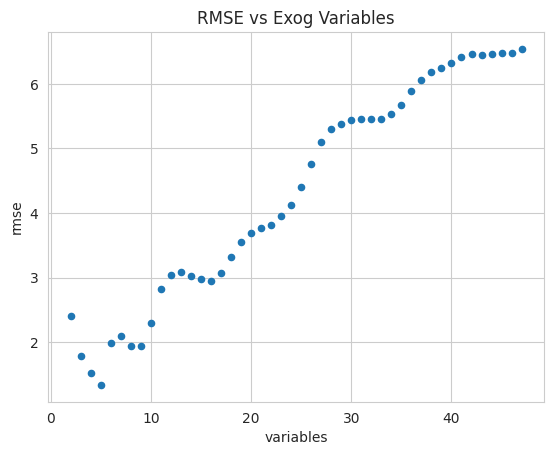

In [ ]:
# create rmse vs lag graph
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

def rmse(data, target, predict):
  return np.sqrt(mean_squared_error(data[:len(predict)][target], predict))

# Assuming you have data_47_58, data_59_03, factors, yoy_gdp defined

rmse_list = []
yoy_gdp = data_47_58['yoy_gdp']
lags = 1
exog_var = list(range(2,len(yoy_gdp)))
for var in exog_var:  # Test lags from 1 to 12
    # 1. Extract Factors and Target Variable
    factor1 = factors[:, 0]
    factor2 = factors[:, 1]
    fact1_ser = pd.Series(factor1)
    fact2_ser = pd.Series(factor2)
    fact1_ser.name = 'factor1'
    fact2_ser.name = 'factor2'

    # 2. Create lagged variables
    factor1_lag = fact1_ser.shift(1).dropna().values
    factor2_lag = fact2_ser.shift(1).dropna().values
    yoy_gdp_lag = yoy_gdp.shift(1).dropna().values

    # 3. Combine lagged-feature variables and lagged-target variables
    X = np.column_stack((factor1_lag, factor2_lag, yoy_gdp_lag))
    y = yoy_gdp[1:]

    # 4. Fit the AR model
    model = AutoReg(y, lags=1, old_names=False, exog=X)
    model_fit = model.fit()

    # 5. Prediction
    exog_oos = np.tile(X[-1], (var, 1))
    # Fill potential NaNs in exog_oos with the mean of the respective column
    for i in range(exog_oos.shape[1]):
        exog_oos[:, i] = np.nan_to_num(exog_oos[:, i], np.nanmean(exog_oos[:, i]))

    pred = model_fit.predict(start=len(y), end=len(y)+var-1, exog_oos=exog_oos)
    pred.drop(pred.index[-1], inplace=True)

    # 6. Calculate RMSE and append to the list
    rmse_val = rmse(data_59_71, 'yoy_gdp', pred)
    rmse_list.append(rmse_val)

# Print the RMSE list
rmse_df = pd.DataFrame({'variables':exog_var, 'rmse':rmse_list})
rmse_df.plot(kind = 'scatter', x = 'variables', y = 'rmse', title = 'RMSE vs Exog Variables')

# You can further process the rmse_list to find the optimal lag

In [ ]:
# create a function of AR-FM-SE model
def ar_fm_se (data_train, data_target, feats, target, lag, exog_val):
  # assuming 'data' is your DataFrame with relevant variables
  data_subset = data_train[feats]

  # create and fit the factor analysis model
  fac_modl = Factor(data_subset, n_factor = 2, method = 'pa')
  result = fac_modl.fit()
  # get factor loading
  factor_loading = result.loadings
  factors = result.factor_scoring(method='regression')

  # Extract Factor and Target Variable
  factor1 = factors[:, 0]
  factor2 = factors[:, 1]
  fact1_ser = pd.Series(factor1)
  fact2_ser = pd.Series(factor2)
  fact1_ser.name = 'factor1'
  fact2_ser.name = 'factor2'

  # Add Target in Data Train
  yoy_target = data_train[target]

  # create lagged variable
  factor1_lag = fact1_ser.shift(1).dropna().values
  factor2_lag = fact2_ser.shift(1).dropna().values
  data_yoy_lag = yoy_target.shift(1).dropna().values

  # Combine lagged-feature variables and lagged-target variables
  X = np.column_stack((factor1_lag, factor2_lag, data_yoy_lag))
  y = yoy_target[1:]

  # Fit AR model
  model = AutoReg(y, lags=lag, old_names=False, exog=X)
  model_fit = model.fit()

  # predict
  exog_oos = np.tile(X[-1], (exog_val, 1))
  # Fill potential NaNs in exog_oos with the mean of the respective column
  for i in range(exog_oos.shape[1]):
    exog_oos[:, i] = np.nan_to_num(exog_oos[:, i], np.nanmean(exog_oos[:, i]))

  pred = model_fit.predict(start = len(y), end = len(y) + exog_val - 1, exog_oos = exog_oos)
  pred.drop(pred.index[-1], inplace = True)

  # Calculate RMSE
  rmse_val = rmse(data_target, target, pred)
  real_data = data_test[['date', target]]
  real_data.set_index('date', inplace = True)

  # Convert the pred result to DataFrame
  pred_df = pd.DataFrame({'gdp_pred':pred, 'time':real_data.index[:len(pred)]})

  # Plot data
  return rmse_val, exog_oos, pred_df

In [ ]:
def arfmse_visual(data_train, data_test, data_pred):
  sns.lineplot(data = data_train, x = 'date', y = 'yoy_gdp', label = 'Latest Data')
  sns.lineplot(data = data_test.iloc[:len(data_pred)], x = 'date', y = 'yoy_gdp', label = 'Actual')
  sns.lineplot(data = data_pred, x = 'time', y = 'gdp_pred', label = 'Prediction')
  plt.legend()
  plt.ylabel('YoY Growth')
  plt.title('GDP Growth (AR-FM-SE Model)')
  return plt.show()

### 1. Train 1947 - 1958 | Predict 1959-1971 | AR-FM-SE Model

In [ ]:
# Prediction based on 1947 - 1958 features
feat_47_58 = ['yoy_gdp', 'yoy_impgs', 'yoy_gpdic', 'yoy_pce', 'yoy_expgs', 'yoy_iputil']
lags =3
val = 6
target = 'yoy_gdp'
data_train = data_47_58
data_test = data_59_71
rmse_score1, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_47_58, target = target, lag = lags, exog_val=val)
print(rmse_score1)

5.6218194090216596


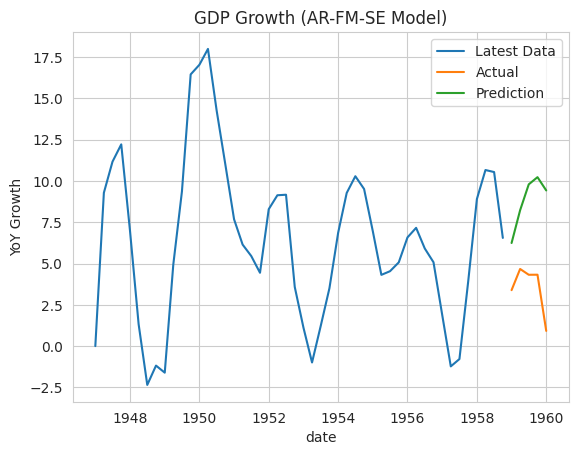

In [ ]:
sns.lineplot(data = data_train, x = 'date', y = target, label = 'Latest Data')
sns.lineplot(data = data_test.iloc[:len(pred_df)], x = 'date', y = target, label = 'Actual')
sns.lineplot(data = pred_df, x = 'time', y = 'gdp_pred', label = 'Prediction')
plt.legend()
plt.ylabel('YoY Growth')
plt.title('GDP Growth (AR-FM-SE Model)')
plt.show()

### 2. Train 1947 - 1958 | Predict 1972-2003 | AR-FM-SE Model

In [ ]:
# Prediction based on 1947 - 1958 features
feat_47_58 = ['yoy_gdp', 'yoy_impgs', 'yoy_gpdic', 'yoy_pce', 'yoy_expgs', 'yoy_iputil']
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_47_58
data_test = data_72_03
rmse_score2, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_47_58, target = target, lag = lags, exog_val=val)
print(rmse_score2)

2.9336485880481917


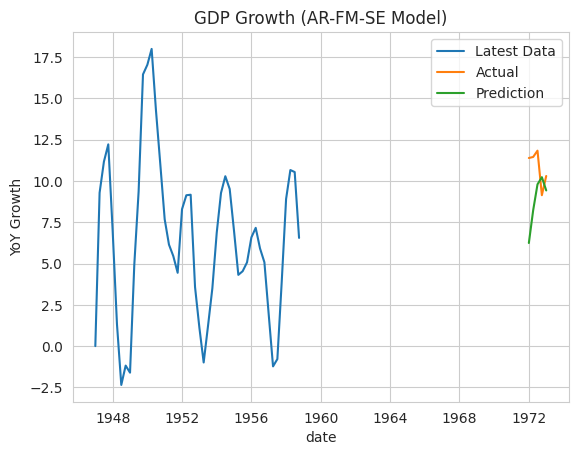

In [ ]:
arfmse_visual(data_train, data_test, pred_df)

### 3. Train 1947 - 1958 | Predict 2004-2024 | AR-FM-SE Model

In [ ]:
# Prediction based on 1947 - 1958 features
feat_47_58 = ['yoy_gdp', 'yoy_impgs', 'yoy_gpdic', 'yoy_pce', 'yoy_expgs', 'yoy_iputil']
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_47_58
data_test = data_04_24
rmse_score3, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_47_58, target = target, lag = lags, exog_val=val)
print(rmse_score3)

2.9826657748313883


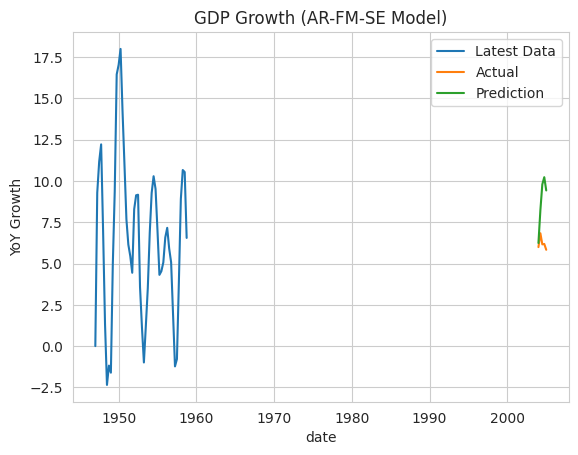

In [ ]:
arfmse_visual(data_train, data_test, pred_df)

### 4. Train 1959 - 1971 | Predict 1972 - 2003 | AR-FM-SE Model

In [ ]:
# Predict and Print RMSE Score
feat_59_71 = data_59_71.columns.tolist()
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_59_71
data_test = data_72_03
feat_59_71.remove('date')
rmse_score4, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_59_71, target = target, lag = lags, exog_val=val)
print(rmse_score4)

2.3180238484125737


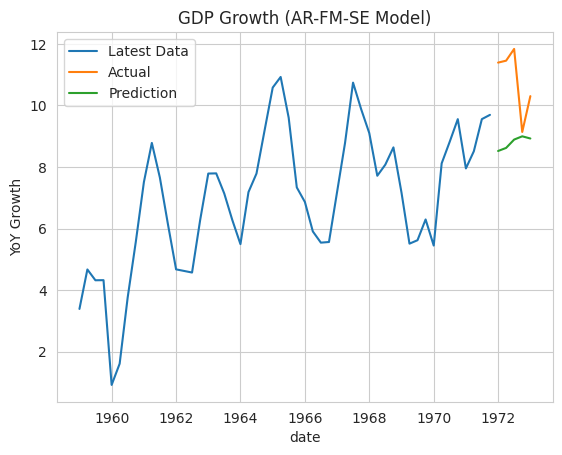

In [ ]:
 # visualize the prediction score
arfmse_visual(data_train, data_test, pred_df)

### 4. Train 1959 - 1971 | Predict 2004 - 2024 | AR-FM-SE Model

In [ ]:
# Predict and Print RMSE Score
feat_59_71 = data_59_71.columns.tolist()
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_59_71
data_test = data_04_24
feat_59_71.remove('date')
rmse_score5, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_59_71, target = target, lag = lags, exog_val=val)
print(rmse_score5)

2.626111219675091


### 6. Train 1972 - 2003 | Predict 2004-2024 | AR-FM-SE Model

In [ ]:
feat_72_03 = data_72_03.columns.tolist()
lags = 3
val = 6
target = 'yoy_gdp'
data_train = data_72_03
data_test = data_04_24
feat_72_03.remove('date')
rmse_score6, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_59_71, target = target, lag = lags, exog_val=val)
print(rmse_score6)

0.36580190620371966


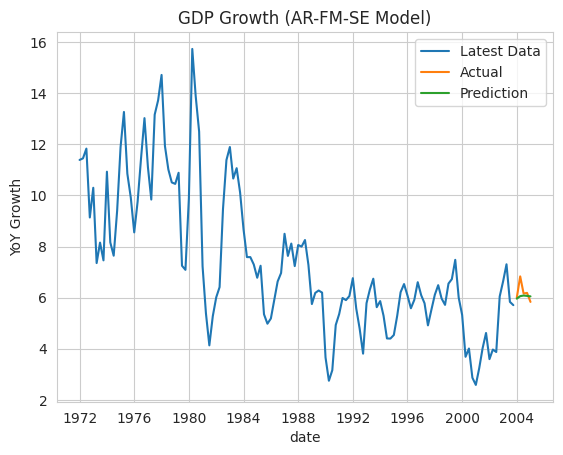

In [ ]:
arfmse_visual(data_train, data_test, pred_df)

,date,yoy_gdp,yoy_impgs,yoy_gpdic,yoy_pce,yoy_expgs,yoy_iputil
307,2023-10-01,5.713734,12.356925,4.858038,5.804856,8.380938,0.438260
308,2024-01-01,5.582929,8.092125,-1.727666,6.757404,5.818288,3.619744
309,2024-04-01,6.334756,7.715036,-4.902391,8.171332,8.183939,1.403142
310,2024-07-01,7.111060,6.575422,-3.473454,8.543355,7.904840,1.317290
311,2024-10-01,8.287412,8.967464,0.583993,8.885612,11.558142,1.013231


In [ ]:
feat_47_24 = data_47_24.columns.tolist()
lags = 12
val = 60
target = 'yoy_gdp'
data_train = data_47_24
data_test = data_04_24
feat_47_24.remove('date')
rmse_score, exog_oos, pred_df = ar_fm_se(data_train = data_train, data_target = data_test, feats = feat_47_24, target = target, lag = lags, exog_val=val)
print(rmse_score)

3.6431002364366267


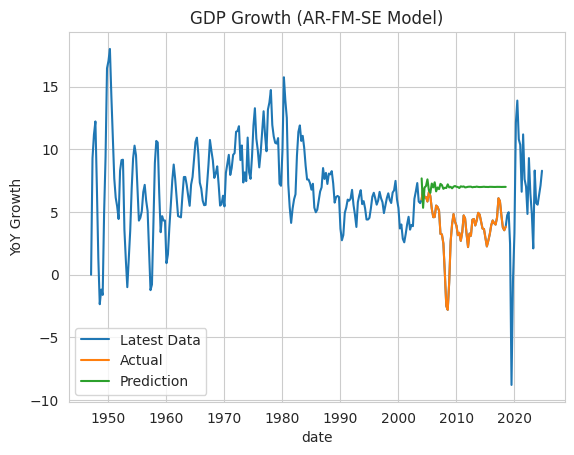

In [ ]:
sns.lineplot(data = data_train, x = 'date', y = target, label = 'Latest Data')
sns.lineplot(data = data_test.iloc[:len(pred_df)], x = 'date', y = target, label = 'Actual')
sns.lineplot(data = pred_df, x = 'time', y = 'gdp_pred', label = 'Prediction')
plt.legend()
plt.ylabel('YoY Growth')
plt.title('GDP Growth (AR-FM-SE Model)')
plt.show()

# Gradient Boost Models with Squared Error

## Using Machine Learning Model (XGBoost - GBTree) with Squared Error

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Create a Function of XGB model
def xgb_mod(df_train, df_test, features):
  if 'yoy_gdp' in features:
    features.remove('yoy_gdp')
    features.remove('date')

  X_train = df_train[features]
  X_test = df_test[features]
  y_train = df_train['yoy_gdp']
  y_test = df_test['yoy_gdp']

  dtrain = xgb.DMatrix(X_train, label = y_train)
  dtest = xgb.DMatrix(X_test, label = y_test)
  params = {
      'objective': 'reg:squarederror',
      'eval_metric': 'rmse',
      'eta': 0.1,
      'max_depth': 3
  }
  num_rounds = 100
  model = xgb.train(params, dtrain, num_rounds)
  y_pred = model.predict(dtest)
  rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
  pred_df = pd.DataFrame({'yoy_gdp':y_pred, 'date':df_test.date.iloc[:len(y_pred)]})
  return rmse, pred_df

In [ ]:
# Visualize the result
def visual_xgb (actual_data, pred_data, target, error_score):
  plt.figure(figsize=(12,5))
  sns.lineplot(data = actual_data, x = 'date', y = target, label = 'Actual')
  sns.lineplot(data = pred_data, x = 'date', y = target, label = f'Prediction (RMSE {error_score})')
  plt.legend()
  plt.ylabel('YoY Growth')
  plt.title('GDP Growth (XGBoost Model)')
  return plt.show()

### 0. Train: 1947-1958 | Predict: 1947-1958 | XGBoost (eta: 0.1, max_depth: 3)

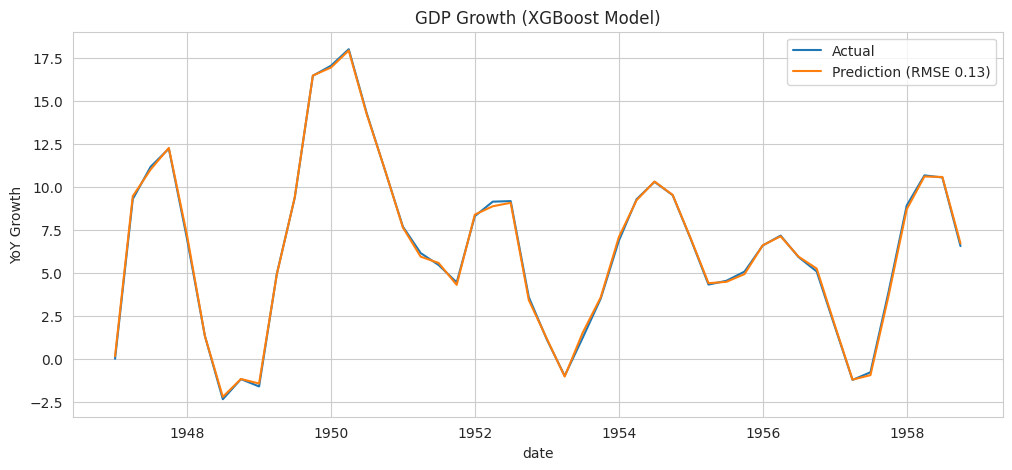

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_xgb0, pred_xgb0 = xgb_mod(data_47_58, data_47_58, feats_47)
# visualize
visual_xgb(data_47_58, pred_xgb0, 'yoy_gdp', rmse_xgb0)

### 1. Train: 1947-1958 | Test: 1959-1971 | XGBoost (eta: 0.1, max_depth: 3)

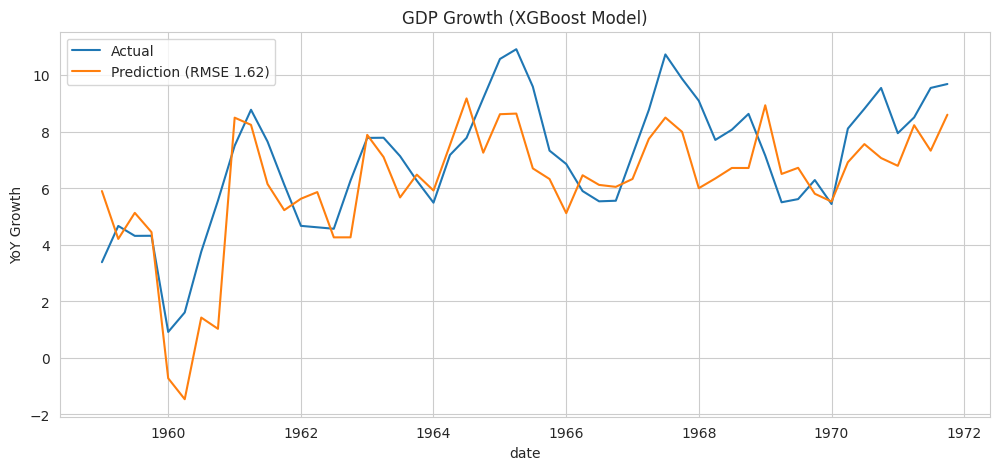

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_xgb1, pred_xgb1 = xgb_mod(data_47_58, data_59_71, feats_47)
# visualize
visual_xgb(data_59_71, pred_xgb1, 'yoy_gdp', rmse_xgb1)

### 2. Train: 1947-1958 | Predict: 1972-2003 | XGBoost (eta: 0.1, max_depth: 3)

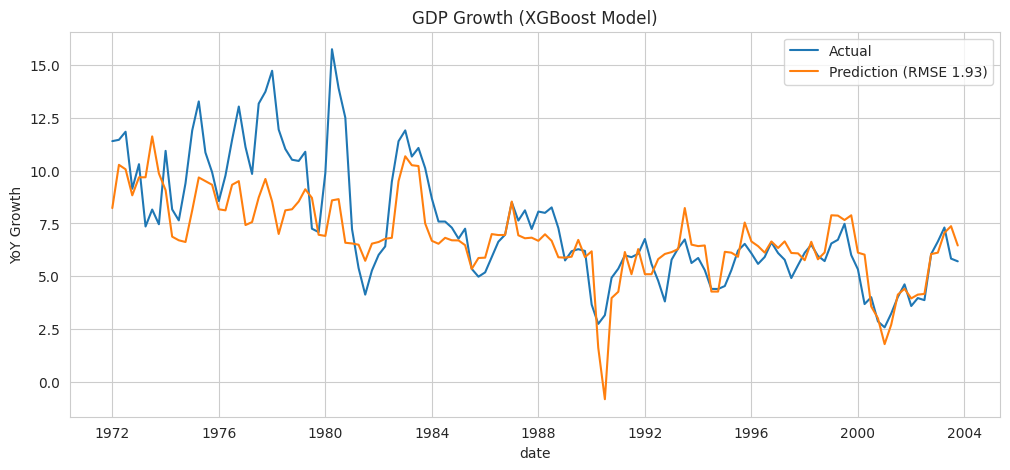

In [ ]:
rmse_xgb2, pred_xgb2 = xgb_mod(data_47_58, data_72_03, feats_47)
# visualize
visual_xgb(data_72_03, pred_xgb2, 'yoy_gdp', rmse_xgb2)

### 3. Train: 1947-1958 | Predict: 2004-2024 | XGBoost (eta: 0.1, max_depth: 3)

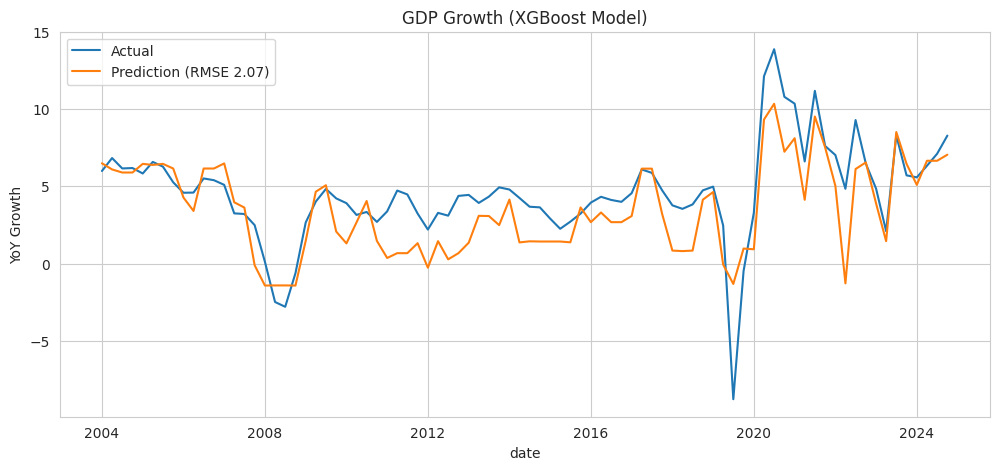

In [ ]:
rmse_xgb3, pred_xgb3 = xgb_mod(data_47_58, data_04_24, feats_47)
# visualize
visual_xgb(data_04_24, pred_xgb3, 'yoy_gdp', rmse_xgb3)

### 4. Train: 1959-1971 | Predict: 1972-2003| XGBoost (eta: 0.1, max_depth: 3)

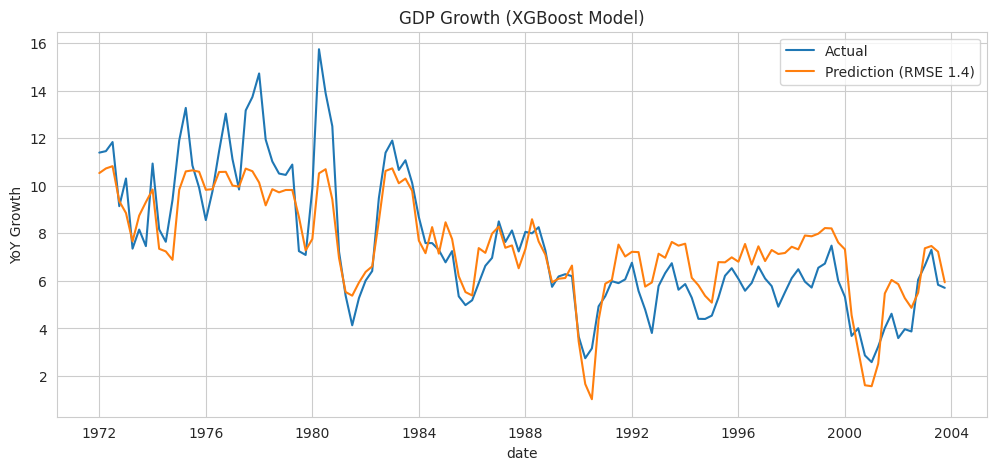

In [ ]:
feats_59 = data_59_71.columns.tolist()
rmse_xgb4, pred_xgb4 = xgb_mod(data_59_71, data_72_03, feats_59)
# visualize
visual_xgb (data_72_03, pred_xgb4, 'yoy_gdp', rmse_xgb4)

### 5. Train: 1959 - 1971 | Predict: 2004 - 2024 | XGBoost (eta: 0.1, max_depth: 3)

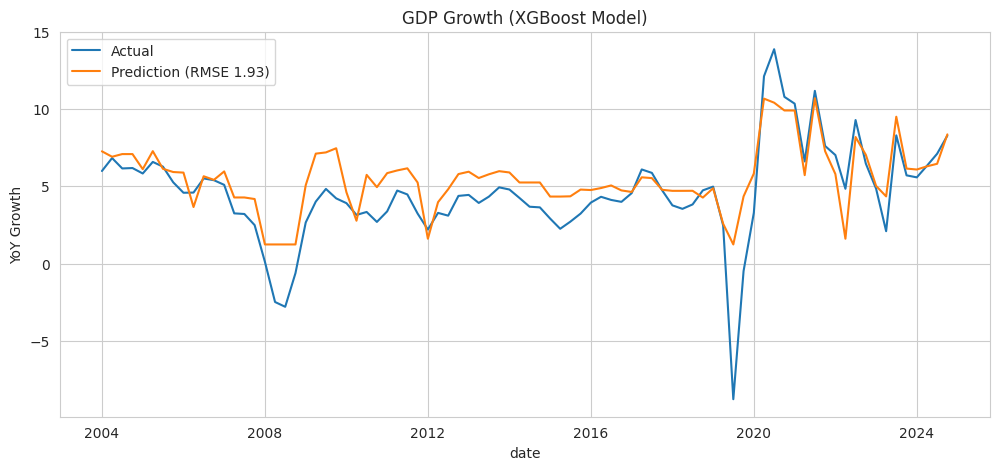

In [ ]:
rmse_xgb5, pred_xgb5 = xgb_mod(data_59_71, data_04_24, feats_59)
# visualize
visual_xgb(data_04_24, pred_xgb5, 'yoy_gdp', rmse_xgb5)

### 6. Train: 1972 - 2003 | Predict: 2004 - 2024 | XGBoost (eta: 0.1, max_depth: 3)

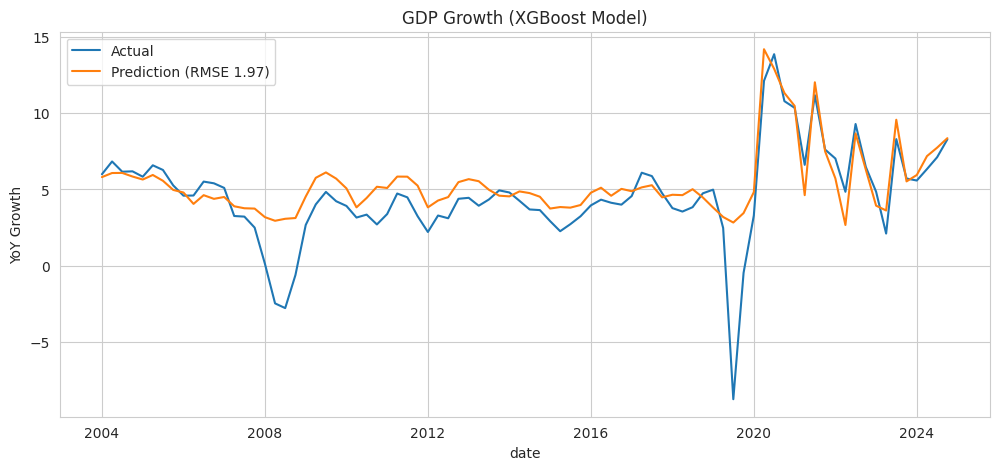

In [ ]:
feats_72 = data_72_03.columns.tolist()
rmse_xgb6, pred_xgb6 = xgb_mod(data_72_03, data_04_24, feats_72)
# visualize
visual_xgb (data_04_24, pred_xgb6, 'yoy_gdp', rmse_xgb6)

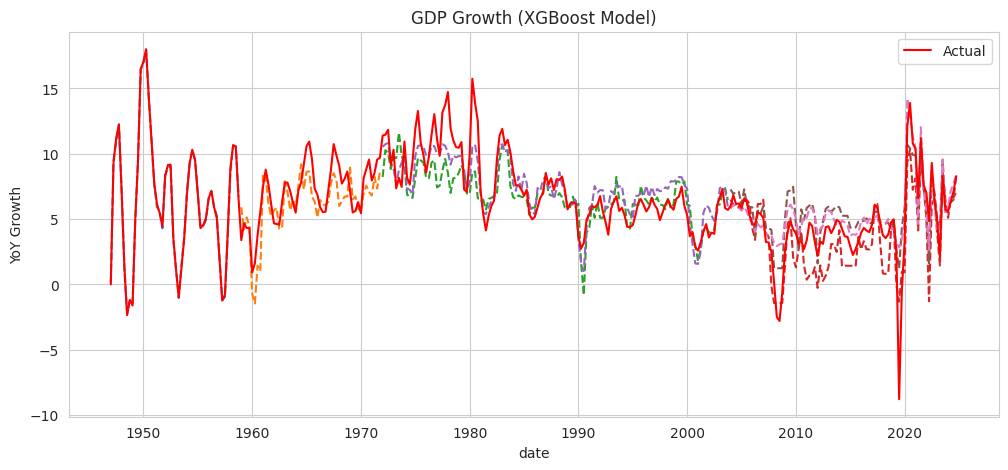

In [ ]:
# Visualize all Prediction and Actual Value of yoy_gdp
pred_xgb = [pred_xgb0, pred_xgb1, pred_xgb2, pred_xgb3, pred_xgb4, pred_xgb5, pred_xgb6]
def visual_pred_xgb(pred_list, actual_data, target):
  plt.figure(figsize = (12,5))
  if len(pred_list) > 1:
    for pred in pred_list:
      sns.lineplot(data = pred, x = 'date', y = target, linestyle = '--')
  sns.lineplot(data = actual_data, x = 'date', y = target, label = 'Actual', color = 'red')
  plt.ylabel('YoY Growth')
  plt.title('GDP Growth (XGBoost Model)')
  return plt.show()
visual_pred_xgb(pred_xgb, data_47_24, 'yoy_gdp')

## Create Hyperparameter Tuning of XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
def xgb_mod_hyperparams(df_train, df_test, features):
  if 'yoy_gdp' in features:
    features.remove('yoy_gdp')
    features.remove('date')

  X_train = df_train[features]
  X_test = df_test[features]
  y_train = df_train['yoy_gdp']
  y_test = df_test['yoy_gdp']

  dtrain = xgb.DMatrix(X_train, label = y_train)
  dtest = xgb.DMatrix(X_test, label = y_test)

  # Define hyperparameter grid
  param_grid = {
      'eta': [0.05, 0.1, 0.3, 0.55], # Learning rate
      'max_depth': [1, 3, 5, 7], # Maximum depth of trees
      'n_estimators': [50, 100, 200],  # Number of trees
      'subsample': [0.8, 1.0] # Subsample ratio of the training instances
  }

  # Create XGBoost model
  xgb_mod = xgb.XGBRegressor(objective = 'reg:squarederror', eval_metric = 'rmse')

  # Create GridSearchCV object
  grid_search = GridSearchCV(estimator = xgb_mod, param_grid = param_grid, scoring = 'neg_root_mean_squared_error', cv = 3, verbose = 1)
  grid_search.fit(X_train, y_train)

  # Get best model
  best_mod = grid_search.best_estimator_

  # Make predictions on test data
  y_pred = best_mod.predict(X_test)

  # calculate RMSE
  rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
  best_params = grid_search.best_params_

  # Create Prediction of Dataset
  pred_df = pd.DataFrame({'yoy_gdp':y_pred, 'date':df_test.date.iloc[:len(y_pred)]})
  return rmse, pred_df, best_params



In [ ]:
# Visualize the result
def visual_hyperparam (actual_data, pred_data, target, error_score, params):
  plt.figure(figsize=(12,5))
  sns.lineplot(data = actual_data, x = 'date', y = target, label = 'Actual')
  sns.lineplot(data = pred_data, x = 'date', y = target, label = f'Prediction (RMSE {error_score})')
  plt.legend()
  plt.ylabel('YoY Growth')
  plt.title('GDP Growth (XGBoost Model)')
  param_str = '\n'.join([f'{k}: {v}' for k, v, in params.items()])
  plt.text(0.05, 0.95, param_str, transform = plt.gca().transAxes, fontsize = 10, verticalalignment = 'top', bbox = dict(facecolor = 'white' , alpha = 0.8))
  return plt.show()

### 0. Train: 1947-1958 | Predict: 1947-1958 | Hyperparameter Tuning

Fitting 3 folds for each of 96 candidates, totalling 288 fits


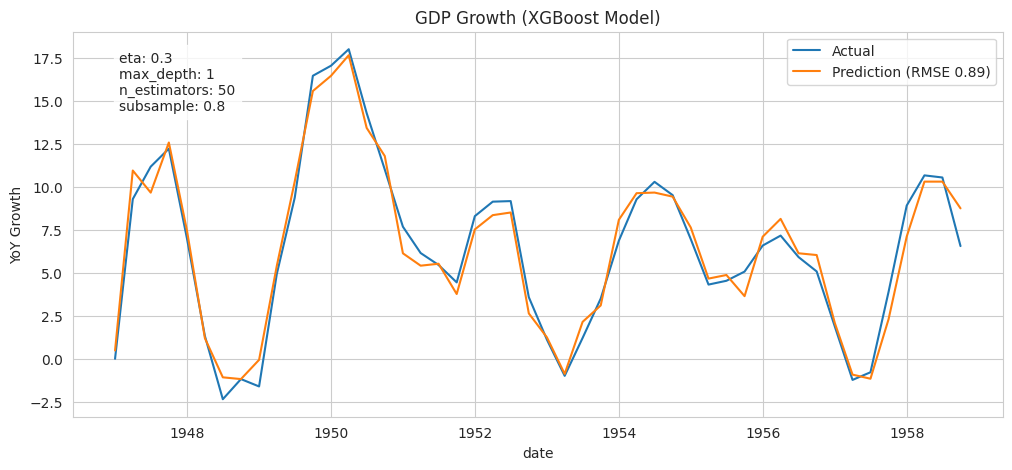

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_xgb0h, pred_xgb0h, params = xgb_mod_hyperparams(data_47_58, data_47_58, feats_47)
# visualize
visual_hyperparam(data_47_58, pred_xgb0h, 'yoy_gdp', rmse_xgb0h, params)

### 1. Train: 1947-1958 | Predict: 1959-1971 | Hyperparameter Tuning

Fitting 3 folds for each of 96 candidates, totalling 288 fits


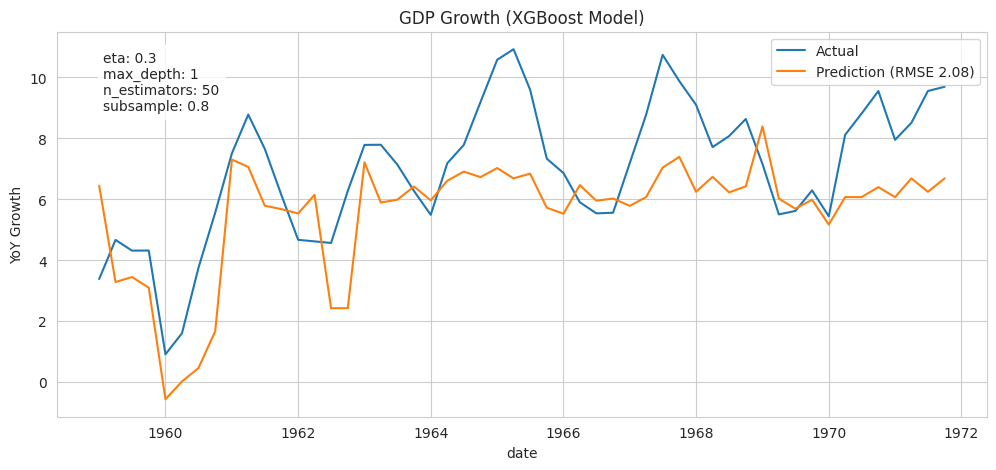

In [ ]:
feats_47 = data_47_58.columns.tolist()
rmse_xgb1h, pred_xgb1h, params = xgb_mod_hyperparams(data_47_58, data_59_71, feats_47)
# visualize
visual_hyperparam(data_59_71, pred_xgb1h, 'yoy_gdp', rmse_xgb1h, params)

### 2. Train: 1947-1958 | Predict: 1972-2003 | Hyperparameter Tuning

Fitting 3 folds for each of 96 candidates, totalling 288 fits


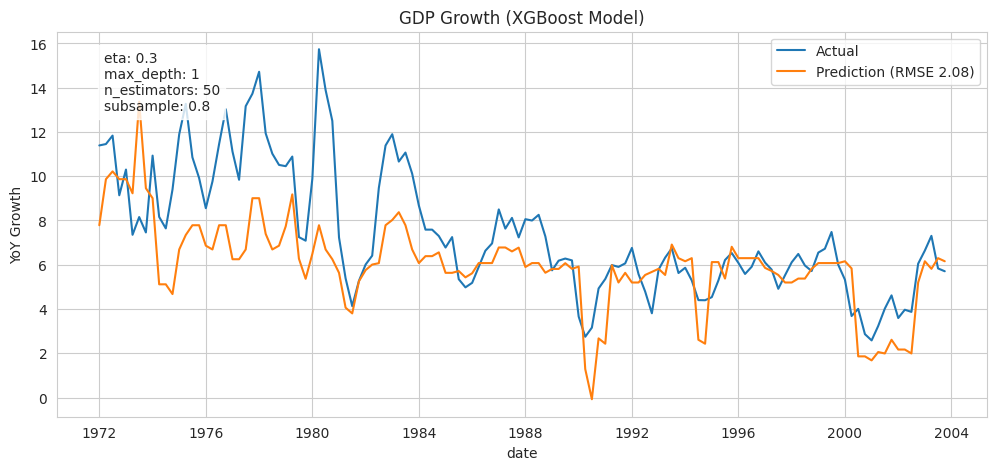

In [ ]:
rmse_xgb2h, pred_xgb2h, params = xgb_mod_hyperparams(data_47_58, data_72_03, feats_47)
# visualize
visual_hyperparam(data_72_03, pred_xgb2h, 'yoy_gdp', rmse_xgb1h, params)

### 3. Train: 1947 - 1958 | Predict: 2004-2024 | Hyperparameter Tuning XGBoost

Fitting 3 folds for each of 96 candidates, totalling 288 fits


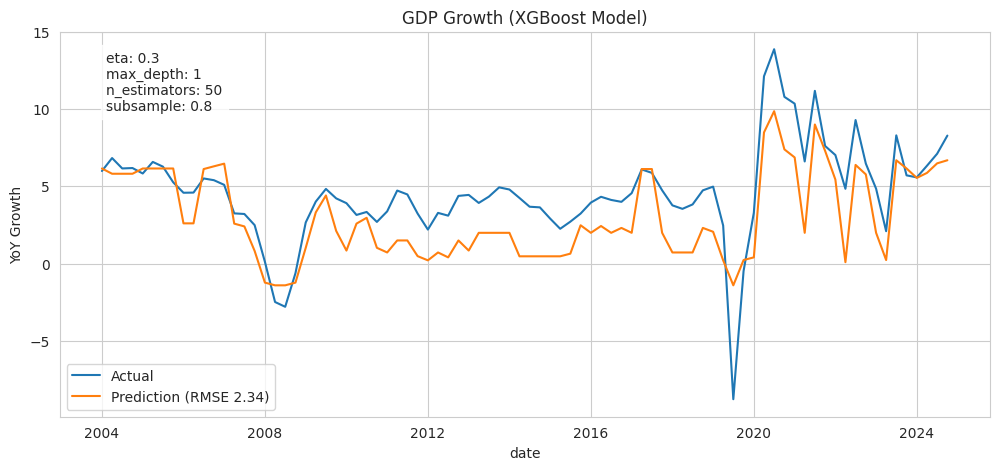

In [ ]:
rmse_xgb3h, pred_xgb3h, params = xgb_mod_hyperparams(data_47_58, data_04_24, feats_47)
# visualize
visual_hyperparam(data_04_24, pred_xgb3h, 'yoy_gdp', rmse_xgb3h, params)

### 4. Train: 1959-1971 | Predict: 1972-2003 | Hyperparameter Tuning XGBoost

Fitting 3 folds for each of 96 candidates, totalling 288 fits


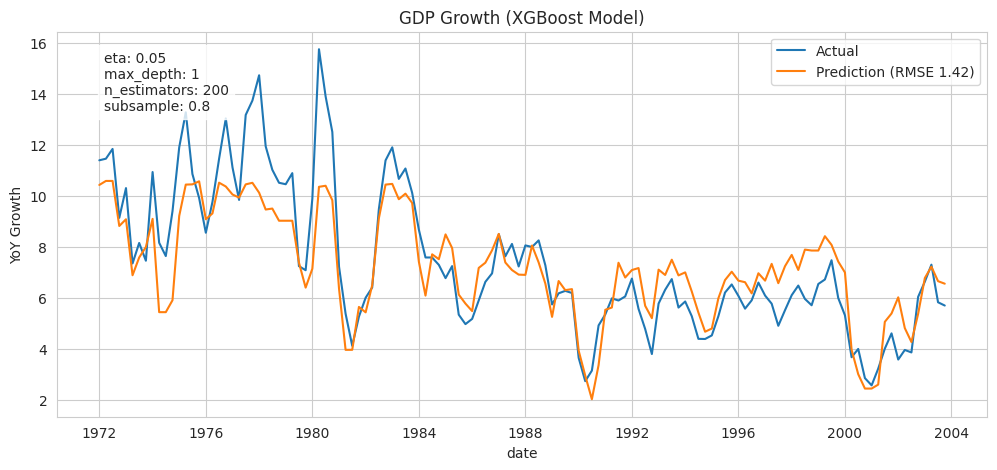

In [ ]:
feats_59 = data_59_71.columns.tolist()
rmse_xgb4h, pred_xgb4h, params = xgb_mod_hyperparams(data_59_71, data_72_03, feats_59)
# visualize
visual_hyperparam(data_72_03, pred_xgb4h, 'yoy_gdp', rmse_xgb4h, params)

### 5. Train: 1958-1971 | Predict: 2004-2024 | Hyperparameter Tuning XGBoost

Fitting 3 folds for each of 96 candidates, totalling 288 fits


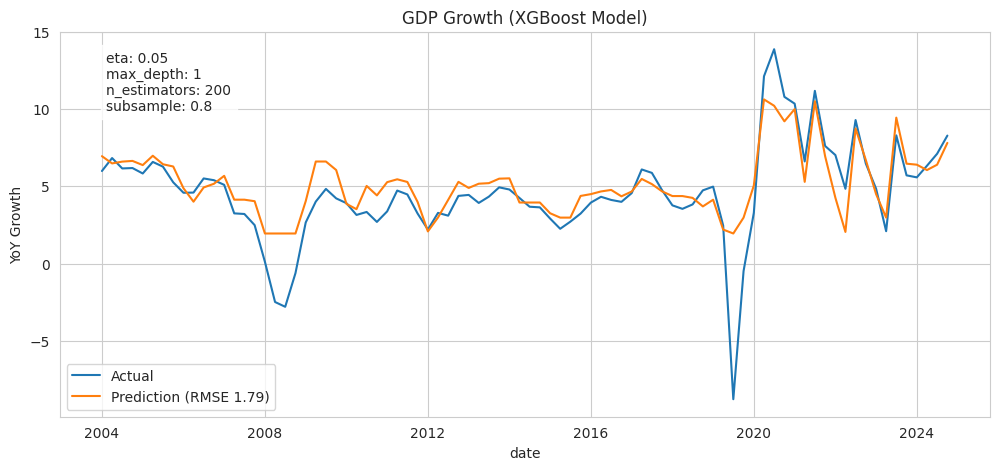

In [ ]:
rmse_xgb5h, pred_xgb5h, params = xgb_mod_hyperparams(data_59_71, data_04_24, feats_59)
# visualize
visual_hyperparam(data_04_24, pred_xgb5h, 'yoy_gdp', rmse_xgb5h, params)

### 6. Train: 1972 - 2003 | Predict: 2004-2024 | Hyperparameter Tuning XGBoost

Fitting 3 folds for each of 96 candidates, totalling 288 fits


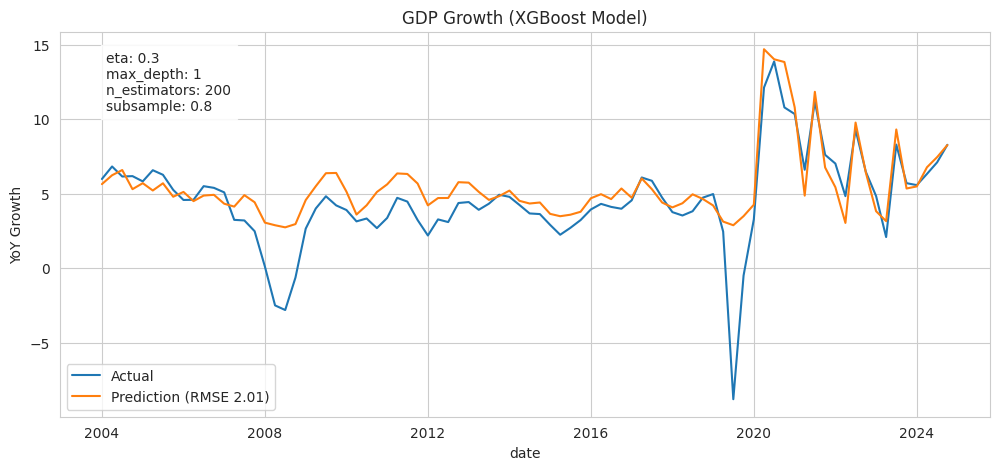

In [ ]:
feats_72 = data_72_03.columns.tolist()
rmse_xgb6h, pred_xgb6h, params = xgb_mod_hyperparams(data_72_03, data_04_24, feats_72)
# visualize
visual_hyperparam(data_04_24, pred_xgb6h, 'yoy_gdp', rmse_xgb6h, params)

Note: The model cannot do precise prediction of YoY growth on 2008 and 2020 due to economic crisis. Based on historical records, subprime mortgage is the main issue in 2008.

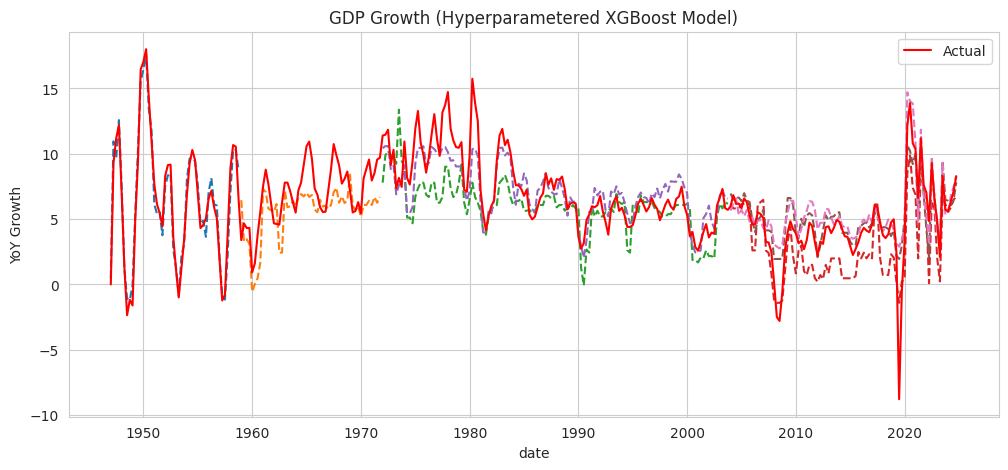

In [ ]:
# Visualize all Prediction and Actual Value of yoy_gdp
pred_xgb = [pred_xgb0h, pred_xgb1h, pred_xgb2h, pred_xgb3h, pred_xgb4h, pred_xgb5h, pred_xgb6h]
def visual_pred_xgb_h(pred_list, actual_data, target):
  plt.figure(figsize = (12,5))
  if len(pred_list) > 1:
    for pred in pred_list:
      sns.lineplot(data = pred, x = 'date', y = target, linestyle = '--')
  sns.lineplot(data = actual_data, x = 'date', y = target, label = 'Actual', color = 'red')
  plt.ylabel('YoY Growth')
  plt.title('GDP Growth (Hyperparametered XGBoost Model)')
  return plt.show()
visual_pred_xgb_h(pred_xgb, data_47_24, 'yoy_gdp')

## Factor Model with XGBoost

In [ ]:
# create function to make factor dataset
def factor_dataset(data, features):
  if 'date' in features:
    features.remove('date')

  # train model
  fac_modl = Factor(data[features], n_factor = 2, method = 'pa')
  result = fac_modl.fit()

  # ensure factors have the same length

  # get factor scores
  factors = result.factor_scoring(method = 'bartlett')
  data['factor1'], data['factor2'] = factors[:, 0], factors[:,1]
  return data

In [ ]:
# create new data for each batches
feats_47_58 = data_47_58.columns.tolist()
newdata_47_58 = factor_dataset(data_47_58, feats_47_58)

feats_59_71 = data_59_71.columns.tolist()
newdata_59_71 = factor_dataset(data_59_71, feats_59_71)

feats_72_03 = data_72_03.columns.tolist()
newdata_72_03 = factor_dataset(data_72_03, feats_72_03)

feats_04_24 = data_04_24.columns.tolist()
newdata_04_24 = factor_dataset(data_04_24, feats_04_24)

In [ ]:
feats = newdata_47_58.columns.tolist()
rmse, pred_df, params = xgb_mod_hyperparams(newdata_47_58, newdata_59_71, feats)
# visualize
visual_hyperparam(newdata_59_71, pred_df, 'yoy_gdp', rmse, params)

Drop this combined model(XGBOOST + FACTOR MODEL) due to high RMSE

## Regularized Model (Lasso Model)

In [ ]:
from sklearn.linear_model import Lasso
def lasso_model (data_train, data_test, target):

  feats = data_train.columns.tolist()
  if 'yoy_gdp' in feats:
    feats.remove('yoy_gdp')
    feats.remove('date')

  X_train = data_train[feats]
  X_test = data_test[feats]
  y_train = data_train[target]
  y_test = data_test[target]

  #import and train model
  lasso_model = Lasso(alpha=0.53)
  lasso_model.fit(X_train, y_train)

  #import and test model
  y_pred = lasso_model.predict(X_test)
  rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

  # CREATE DATASET
  pred_lasso_df = pd.DataFrame({'yoy_gdp':y_pred, 'date':data_test.date.iloc[:len(y_pred)]})
  return rmse, pred_lasso_df

In [ ]:
def visual_lasso (actual_data, pred_data, target, error_score):
  sns.lineplot(data = actual_data, x = 'date', y = target, label = 'Actual')
  sns.lineplot(data = pred_data, x = 'date', y = target, label = f'Prediction (RMSE {error_score})')
  plt.legend()
  plt.ylabel('YoY Growth')
  plt.title('GDP Growth (Lasso Model)')
  return plt.show()

In [ ]:
rmse_lasso, pred_lasso_df = lasso_model(data_47_58, data_59_71, 'yoy_gdp')
visual_lasso(data_59_71, pred_lasso_df, 'yoy_gdp', rmse_lasso)

In [ ]:
rmse_lasso, pred_lasso_df = lasso_model(data_47_58, data_04_24, 'yoy_gdp')
visual_lasso(data_72_03, pred_lasso_df, 'yoy_gdp', rmse_lasso)

Now you can use the `fred` object to fetch data from the FRED API.